In [36]:
import pandas as pd
import numpy as np
import os 
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


## Segmented Splits

In [43]:
df1 = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Georgetown/NN/Data/Chicago/chicago_labels.csv",dtype={'GEOID': str})
df1['state'] = 'chicago'
df2 = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Georgetown/NN/Data/LA/LA_labels.csv",dtype={'GEOID': str})
df2['state'] = 'LA'
df3 = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Georgetown/NN/Data/NY/NY_labels.csv",dtype={'GEOID': str})
df3['state'] = 'NY'
df = pd.concat([df1,df2,df3])
df.drop(columns = 'Unnamed: 0', inplace = True)
df['id'] = df['state']+'_'+df['GEOID'].astype(str)

a = pd.DataFrame(df.id.value_counts().sort_values(ascending = False))
a.reset_index(inplace= True)
a.rename(columns={'index': 'New_Index'}, inplace=True)
droper = a[a.id > 1].New_Index.tolist()
df = df[~df.id.isin(droper)]
df['names'] = df.GEOID.astype(str)+'.png'

### Data Counts

In [44]:
import os

# Paths to the main directories for each city
directories = [
    "D:\\blocks\\splits\\splits_chicago",
    "D:\\blocks\\splits\\splits_LA",
    "D:\\blocks\\splits\\splits_NY"
]

# Function to count files in subdirectories
def count_files_in_subdirectories(parent_directory):
    total_files = 0
    for subdir, dirs, files in os.walk(parent_directory):
        for file in files:
            total_files += 1
    return total_files

# Initialize counts
train_count = 0
test_count = 0
validate_count = 0
city_counts = {}  # Dictionary to keep city-specific counts

# Process each directory
for directory in directories:
    city_name = directory.split('\\')[-1]  # Extract city name from the path
    city_counts[city_name] = {'train': 0, 'test': 0, 'validate': 0}
    # Checking subfolders in the main directory
    if os.path.exists(directory):
        for folder in os.listdir(directory):
            folder_path = os.path.join(directory, folder)
            if folder == 'train':
                count = count_files_in_subdirectories(folder_path)
                train_count += count
                city_counts[city_name]['train'] += count
            elif folder == 'test':
                count = count_files_in_subdirectories(folder_path)
                test_count += count
                city_counts[city_name]['test'] += count
            elif folder == 'val':
                count = count_files_in_subdirectories(folder_path)
                validate_count += count
                city_counts[city_name]['validate'] += count

# Output results
print(f"Total training samples: {train_count}")
print(f"Total testing samples: {test_count}")
print(f"Total validation samples: {validate_count}")
print(f"Total samples across all splits: {train_count + test_count + validate_count}")

# Print city-specific consolidated counts
for city, counts in city_counts.items():
    total_city_samples = sum(counts.values())
    print(f"{city}: Total samples across all categories: {total_city_samples}")

Total training samples: 2343
Total testing samples: 294
Total validation samples: 293
Total samples across all splits: 2930
splits_chicago: Total samples across all categories: 747
splits_LA: Total samples across all categories: 898
splits_NY: Total samples across all categories: 1285


### UHI descriptives

In [45]:
for i in df.state.unique():
    state_data = df[df.state == i]
    avg_mean = state_data['average'].mean()
    avg_max = state_data['average'].max()
    avg_min = state_data['average'].min()
    
    
    print(f"State: {i}")
    print(f"  Mean Average: {avg_mean:.2f}") 
    print(f"  Maximum Average: {avg_max:.2f}") 
    print(f"  Minimum Average: {avg_min:.2f}")
    print("------")

overall_mean = df['average'].mean()
overall_max = df['average'].max()
overall_min = df['average'].min()

print(f"Overall")
print(f"  Mean Average: {overall_mean:.2f}") 
print(f"  Maximum Average: {overall_max:.2f}") 
print(f"  Minimum Average: {overall_min:.2f}")
print("------")

State: chicago
  Mean Average: 0.64
  Maximum Average: 2.93
  Minimum Average: -32.34
------
State: LA
  Mean Average: 0.79
  Maximum Average: 3.49
  Minimum Average: -46.49
------
State: NY
  Mean Average: -2.38
  Maximum Average: 2.80
  Minimum Average: -51.90
------
Overall
  Mean Average: 0.01
  Maximum Average: 3.49
  Minimum Average: -51.90
------


### Density Plot

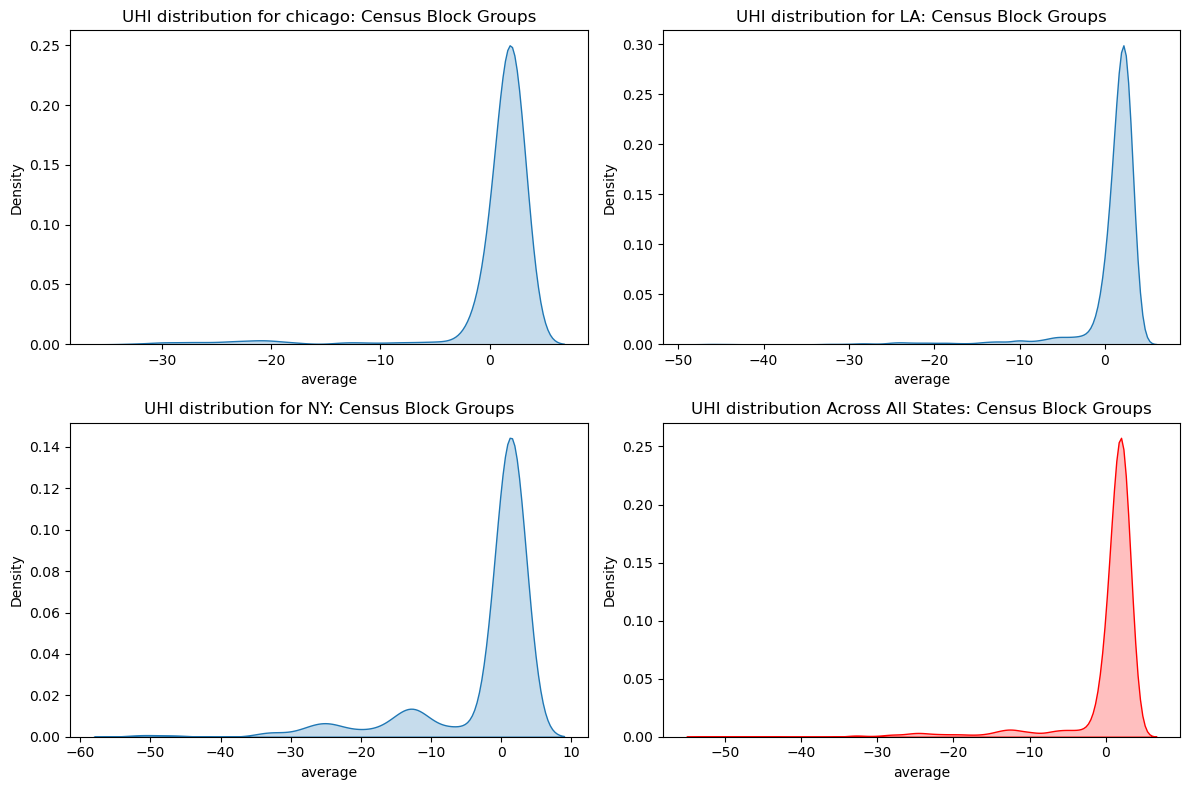

In [37]:
plt.figure(figsize=(12, 8))

# Create a density plot for each state
for i, state in enumerate(df['state'].unique(), 1):
    plt.subplot(2, 2, i)  # Adjust the subplot index based on your number of states
    sns.kdeplot(df[df['state'] == state]['average'], shade=True)
    plt.title(f'UHI distribution for {state}: Census Block Groups')

# Combined density plot for all states
plt.subplot(2, 2, i+1)  # Ensure this subplot index follows the last state index
sns.kdeplot(df['average'], shade=True, color='red')
plt.title('UHI distribution Across All States: Census Block Groups')

plt.tight_layout()
plt.show();

## Aerial Splits

In [46]:
df1 = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Georgetown/NN/Data/Chicago/chicago_labels_aeria.csv",dtype={'GEOID': str})
df1['state'] = 'chicago'
df2 = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Georgetown/NN/Data/LA/LA_labels_aeria.csv",dtype={'GEOID': str})
df2['state'] = 'LA'
df3 = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Georgetown/NN/Data/NY/NY_labels_aeria.csv",dtype={'GEOID': str})
df3['state'] = 'NY'
df = pd.concat([df1,df2,df3])
df.drop(columns = 'Unnamed: 0', inplace = True)
df['id'] = df['state']+'_'+df['GEOID'].astype(str)

a = pd.DataFrame(df.id.value_counts().sort_values(ascending = False))
a.reset_index(inplace= True)
a.rename(columns={'index': 'New_Index'}, inplace=True)
droper = a[a.id > 1].New_Index.tolist()
df = df[~df.id.isin(droper)]
df['names'] = df.GEOID.astype(str)+'.png'

### Data Counts

In [47]:
import os

# Path to the main directory
root_directory = "D:\\blocks\\aerial_splits"

# Subdirectories 'train', 'test', 'validate'
categories = ['train', 'test', 'validate']

# Function to count files in subdirectories
def count_files_in_subdirectories(parent_directory):
    total_files = 0
    for subdir, dirs, files in os.walk(parent_directory):
        for file in files:
            total_files += 1
    return total_files

# Initialize a dictionary to hold the counts for each category
category_counts = {category: 0 for category in categories}

# Process each category directory
for category in categories:
    category_path = os.path.join(root_directory, category)
    if os.path.exists(category_path):
        category_counts[category] += count_files_in_subdirectories(category_path)

# Output results
for category, count in category_counts.items():
    print(f"Total {category} samples: {count}")

# Sum of all categories
total_samples = sum(category_counts.values())
print(f"Total samples across all categories: {total_samples}")

Total train samples: 4494
Total test samples: 604
Total validate samples: 606
Total samples across all categories: 5704


### UHI descriptives

In [49]:
for i in df.state.unique():
    state_data = df[df.state == i]
    avg_mean = state_data['average'].mean()
    avg_max = state_data['average'].max()
    avg_min = state_data['average'].min()
    
    
    print(f"State: {i}")
    print(f"  Mean Average: {avg_mean:.2f}") 
    print(f"  Maximum Average: {avg_max:.2f}") 
    print(f"  Minimum Average: {avg_min:.2f}")
    print("------")

overall_mean = df['average'].mean()
overall_max = df['average'].max()
overall_min = df['average'].min()

print(f"Overall")
print(f"  Mean Average: {overall_mean:.2f}") 
print(f"  Maximum Average: {overall_max:.2f}") 
print(f"  Minimum Average: {overall_min:.2f}")
print("------")

State: chicago
  Mean Average: -44.54
  Maximum Average: 2.84
  Minimum Average: -896.09
------
State: LA
  Mean Average: -62.54
  Maximum Average: 3.53
  Minimum Average: -897.66
------
State: NY
  Mean Average: -158.42
  Maximum Average: 2.73
  Minimum Average: -898.49
------
Overall
  Mean Average: -82.53
  Maximum Average: 3.53
  Minimum Average: -898.49
------


### Density Plot

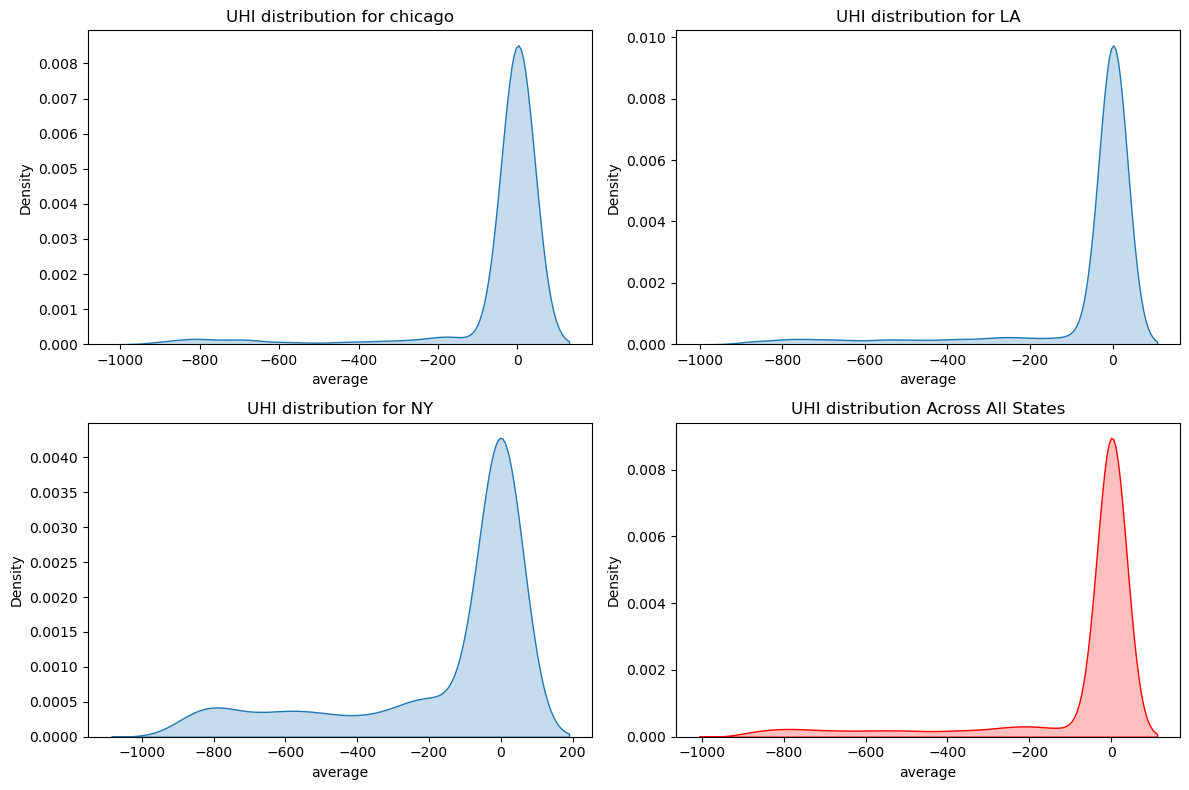

In [41]:
plt.figure(figsize=(12, 8))

# Create a density plot for each state
for i, state in enumerate(df['state'].unique(), 1):
    plt.subplot(2, 2, i)  # Adjust the subplot index based on your number of states
    sns.kdeplot(df[df['state'] == state]['average'], shade=True)
    plt.title(f'UHI distribution for {state}')

# Combined density plot for all states
plt.subplot(2, 2, i+1)  # Ensure this subplot index follows the last state index
sns.kdeplot(df['average'], shade=True, color='red')
plt.title('UHI distribution Across All States')

plt.tight_layout()
plt.show();

In [3]:
df['labs'] = np.where(df['average'] < 0, 'less than 0', 'place')
df['labs'] = np.where((df['average'] >= 0) & (df['average'] < 1.5), 'between 0 and 1.5', df['labs'])
df['labs'] = np.where((df['average'] >= 1.5) , 'more than 1.5', df['labs'])

In [5]:
df.labs.value_counts()

more than 1.5        3156
less than 0          1543
between 0 and 1.5    1384
Name: labs, dtype: int64

In [5]:
df.to_csv('D:/blocks/labels.csv')

## Train Test Splits and Creating Directories

In [78]:
x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:,:5], df['labs'], test_size=0.2, stratify=df['labs'], random_state = 29)

x_train['labs'] = y_train
x_test['labs'] = y_test

x_val, x_test, y_val, y_test = train_test_split(
    x_test.iloc[:,:5], x_test['labs'], test_size=0.5, stratify=x_test['labs'], random_state = 29)

x_val['labs'] = y_val
x_test['labs'] = y_test

In [75]:
x_test

,average,GEOID,state,id,name,labs
381,1.594205,001265,NY,NY_001265,001265.png,more than 1.5
1109,2.296414,005657,LA,LA_005657,005657.png,more than 1.5
669,0.361391,004154,LA,LA_004154,004154.png,between 0 and 1.5
257,1.536900,002752,LA,LA_002752,002752.png,more than 1.5
3356,2.605102,0015824,LA,LA_0015824,0015824.png,more than 1.5
...,...,...,...,...,...,...
1967,-290.228812,008978,LA,LA_008978,008978.png,less than 0
98,-228.145443,00424,NY,NY_00424,00424.png,less than 0
1129,1.064053,005692,LA,LA_005692,005692.png,between 0 and 1.5
1098,2.852971,005639,LA,LA_005639,005639.png,more than 1.5


In [68]:
os.chdir("D:/blocks/aerial_splits")

os.mkdir('./train')
os.mkdir('./test')
os.mkdir('./validate')

In [80]:
g = globals()
for i in ['validate','train','test']:
  df_name = 'x_'+i
  if i == 'validate':
    df_name = 'x_val'
  file_names = [i for i in g[df_name]['names']]

  for name in file_names:
    label_class = g[df_name][g[df_name].names == name]['labs'].values[0]

    state = g[df_name][g[df_name].names == name]['state'].values[0]

    src_base = f"D:/blocks/{state}/aerial_images"
    destination = f'D:/blocks/aerial_splits/{i}/label_{label_class}'

    if not os.path.exists(destination):
      os.makedirs(destination)
    shutil.copyfile(src=f'{src_base}/{name}',
                    dst= f'{destination}/{name}')

'D:/blocks/aerial_splits/validate/label_less than 0/002873.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002068.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002077.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002576.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002283.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013439.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002632.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006901.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002287.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002748.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016960.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001458.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011714.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/007967.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00923.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008033.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003663.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00629.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0020264.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002155.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003677.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001037.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001970.png'

'D:/blocks/aerial_splits/validate/label_less than 0/006082.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007619.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0014201.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001328.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016187.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002526.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00419.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003576.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001397.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002028.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012487.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008900.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013877.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003625.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001223.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005418.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005888.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003009.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002911.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015452.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010791.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002334.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003997.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/008874.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012071.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001899.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001356.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0015879.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004849.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018402.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015492.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0011242.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014738.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014157.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012134.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012948.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00996.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003521.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0017681.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013696.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004387.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005857.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0016625.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001494.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0014610.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0014136.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003382.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0013754.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00112.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004894.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00715.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002909.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016566.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0014762.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002800.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006379.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005382.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001749.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006999.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00567.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001519.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008458.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007997.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001561.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001743.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002879.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0019126.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001014.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008516.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003035.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002675.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009354.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012016.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001501.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001755.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018790.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015460.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002152.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012519.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010371.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008948.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003276.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002268.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006095.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014532.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005416.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016194.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00719.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001984.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003486.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00669.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010253.png'

'D:/blocks/aerial_splits/validate/label_less than 0/007539.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002411.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00121.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009457.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011611.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006669.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002859.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001950.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003571.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00509.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002889.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002344.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011182.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015107.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002567.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010816.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001563.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002383.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004359.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008455.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016563.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012479.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0013389.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002506.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0010242.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001253.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002089.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001891.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015812.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002088.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0013351.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006630.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0050.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003714.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0017315.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0011586.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0011215.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012553.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012127.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015832.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0015148.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001668.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001683.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010262.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001491.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00662.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012467.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013312.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002469.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001638.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001632.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010758.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003116.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013254.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009841.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0014505.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00641.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018777.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00776.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002250.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0011701.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002429.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001802.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003152.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002872.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002374.png'

'D:/blocks/aerial_splits/validate/label_less than 0/009314.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003251.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002288.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012540.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001740.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001662.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008972.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008040.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015455.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012122.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001917.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004189.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012054.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003689.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002236.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00601.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002153.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0025.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002594.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013249.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001410.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006914.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001082.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005113.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007254.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005642.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0017364.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001975.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00588.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001551.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001019.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010750.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001999.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00801.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002021.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00877.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002532.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002919.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0020995.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001919.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002862.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003288.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006122.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/005095.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0014760.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0011202.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005650.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003354.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00357.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00280.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002112.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012876.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006151.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012038.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008066.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007247.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00470.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010338.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016957.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002003.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003685.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009914.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002038.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013256.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004329.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001490.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005653.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010778.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007271.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003121.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003637.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002930.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012855.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/009788.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012577.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002349.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002763.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0017712.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0011588.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00734.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012092.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002282.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011152.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013272.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009909.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001728.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00957.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001126.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003420.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002164.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00353.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001784.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006092.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012999.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0011260.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00600.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003415.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005872.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002545.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001896.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001217.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016969.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002617.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002509.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005151.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012156.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008864.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/008075.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018053.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001536.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006195.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009886.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005607.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006112.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011222.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002381.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0028.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004703.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002886.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004207.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003543.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013264.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00951.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013291.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013729.png'

'D:/blocks/aerial_splits/validate/label_less than 0/004152.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003012.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001461.png'

'D:/blocks/aerial_splits/validate/label_less than 0/007955.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0013372.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003428.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001721.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006728.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006941.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007322.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001871.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016935.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00203.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00553.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006377.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00274.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001055.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004874.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005828.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012923.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002997.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005878.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00954.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003314.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001419.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007014.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002605.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006954.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002133.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00462.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0010806.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012079.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002778.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013724.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003166.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016573.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006352.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002365.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008499.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018036.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014161.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001545.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002950.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008445.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016217.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012935.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013788.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002812.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001274.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005858.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0020628.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002416.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018418.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0010283.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001372.png'

'D:/blocks/aerial_splits/validate/label_less than 0/006899.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003830.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009904.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0010690.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012893.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004370.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003371.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0018395.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00125.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0018785.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013251.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0014608.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003167.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006459.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001520.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002985.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009861.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005644.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002472.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00209.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001906.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002262.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004508.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004332.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001650.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001678.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002421.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0010803.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006397.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002492.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0018076.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0015865.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001988.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002178.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016975.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002741.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003853.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011149.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0014777.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0015515.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003861.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002534.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002804.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0013771.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004495.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009374.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001574.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007980.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012979.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0026.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005906.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00570.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001862.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002427.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001026.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001911.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00548.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002944.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014527.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00551.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002659.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002510.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015844.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0019161.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003250.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003128.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004223.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008504.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002009.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00668.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001448.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015458.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0012056.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0011144.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001901.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003374.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003876.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001918.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002316.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002451.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002584.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005627.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004039.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0019155.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016598.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006927.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/008446.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002652.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001989.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013706.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003382.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001326.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001724.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012457.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0014220.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0011681.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014700.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003670.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00206.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0013668.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00969.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003655.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008408.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002679.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002230.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00550.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00976.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001754.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0017365.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014728.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002343.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0010212.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0011584.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007584.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0020631.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00426.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012943.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00143.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00513.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001981.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/003992.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002900.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001202.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002272.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012818.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002537.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003462.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002856.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00476.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001621.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006191.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002169.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001849.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002419.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004021.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006181.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00439.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0010346.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0010353.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009843.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015819.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016201.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014127.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012573.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00279.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0012507.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001269.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003060.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004929.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003286.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006912.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002965.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006640.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016583.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00354.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0014117.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001658.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006682.png'

'D:/blocks/aerial_splits/validate/label_less than 0/006163.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003053.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004726.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0014747.png'

'D:/blocks/aerial_splits/validate/label_less than 0/00539.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005438.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/006098.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007604.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015825.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009450.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003423.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003649.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002014.png'

'D:/blocks/aerial_splits/validate/label_less than 0/006698.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008860.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00190.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009403.png'

'D:/blocks/aerial_splits/validate/label_less than 0/006419.png'

'D:/blocks/aerial_splits/validate/label_less than 0/009312.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001314.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006655.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006107.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0019894.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003021.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015814.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008400.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004380.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003249.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004157.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0018762.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007244.png'

'D:/blocks/aerial_splits/validate/label_less than 0/001430.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005088.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001007.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006432.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002687.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005387.png'

'D:/blocks/aerial_splits/validate/label_less than 0/002765.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001260.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/008884.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012447.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006401.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/009796.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002894.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002256.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/001388.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001664.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/00401.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0016972.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002994.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013028.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012470.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002739.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0013354.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002329.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/001552.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016568.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/002523.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0017330.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016964.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/008982.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003850.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/002772.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0015827.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/006664.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0011583.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0059.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005106.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007639.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003558.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/007552.png'

'D:/blocks/aerial_splits/validate/label_less than 0/008862.png'

'D:/blocks/aerial_splits/validate/label_less than 0/003661.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0011270.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00159.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/004848.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/003296.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0012477.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/005373.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/0015152.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005179.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/0016596.png'

'D:/blocks/aerial_splits/validate/label_less than 0/005584.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00209.png'

'D:/blocks/aerial_splits/validate/label_between 0 and 1.5/00545.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0011672.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/007002.png'

'D:/blocks/aerial_splits/validate/label_less than 0/0013709.png'

'D:/blocks/aerial_splits/validate/label_more than 1.5/004691.png'

'D:/blocks/aerial_splits/train/label_less than 0/001050.png'

'D:/blocks/aerial_splits/train/label_less than 0/009815.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004041.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006926.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005933.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004912.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007675.png'

'D:/blocks/aerial_splits/train/label_less than 0/002744.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015440.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014528.png'

'D:/blocks/aerial_splits/train/label_less than 0/005925.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008468.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002745.png'

'D:/blocks/aerial_splits/train/label_less than 0/001073.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011240.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004002.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00931.png'

'D:/blocks/aerial_splits/train/label_less than 0/005433.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019501.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011606.png'

'D:/blocks/aerial_splits/train/label_less than 0/004664.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012099.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003468.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009448.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00135.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018071.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003549.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002141.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006381.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008080.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004026.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007209.png'

'D:/blocks/aerial_splits/train/label_less than 0/008852.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003517.png'

'D:/blocks/aerial_splits/train/label_less than 0/001635.png'

'D:/blocks/aerial_splits/train/label_less than 0/002138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009390.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010793.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002242.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003407.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002053.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017702.png'

'D:/blocks/aerial_splits/train/label_less than 0/001117.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004382.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013450.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004398.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004678.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002501.png'

'D:/blocks/aerial_splits/train/label_less than 0/00452.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001118.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010252.png'

'D:/blocks/aerial_splits/train/label_less than 0/002891.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012014.png'

'D:/blocks/aerial_splits/train/label_less than 0/001242.png'

'D:/blocks/aerial_splits/train/label_less than 0/006700.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003037.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002003.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004858.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00160.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010771.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013425.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020623.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002007.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002530.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008518.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00348.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010728.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013804.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002067.png'

'D:/blocks/aerial_splits/train/label_less than 0/001230.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002648.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00422.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0019882.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001106.png'

'D:/blocks/aerial_splits/train/label_less than 0/007652.png'

'D:/blocks/aerial_splits/train/label_less than 0/002420.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007973.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003275.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003695.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018412.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001022.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004888.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014098.png'

'D:/blocks/aerial_splits/train/label_less than 0/002155.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00684.png'

'D:/blocks/aerial_splits/train/label_less than 0/002026.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002786.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001878.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002170.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003011.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001149.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013689.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003328.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004204.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018797.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001864.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015847.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003698.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013244.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013673.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007274.png'

'D:/blocks/aerial_splits/train/label_less than 0/009310.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002667.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002317.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002432.png'

'D:/blocks/aerial_splits/train/label_less than 0/005670.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002996.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002061.png'

'D:/blocks/aerial_splits/train/label_less than 0/002740.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012514.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00822.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002603.png'

'D:/blocks/aerial_splits/train/label_less than 0/001375.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009355.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002158.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001564.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013014.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013347.png'

'D:/blocks/aerial_splits/train/label_less than 0/003081.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00556.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011576.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006931.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018783.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002503.png'

'D:/blocks/aerial_splits/train/label_less than 0/006203.png'

'D:/blocks/aerial_splits/train/label_less than 0/00162.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010764.png'

'D:/blocks/aerial_splits/train/label_less than 0/00281.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008950.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004390.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002228.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003537.png'

'D:/blocks/aerial_splits/train/label_less than 0/009898.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010277.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003692.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003742.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018425.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019506.png'

'D:/blocks/aerial_splits/train/label_less than 0/003383.png'

'D:/blocks/aerial_splits/train/label_less than 0/0065.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004355.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004169.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010715.png'

'D:/blocks/aerial_splits/train/label_less than 0/005178.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018788.png'

'D:/blocks/aerial_splits/train/label_less than 0/007622.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003554.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015120.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019524.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008932.png'

'D:/blocks/aerial_splits/train/label_less than 0/002336.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004503.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012928.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011657.png'

'D:/blocks/aerial_splits/train/label_less than 0/008.png'

'D:/blocks/aerial_splits/train/label_less than 0/00272.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012445.png'

'D:/blocks/aerial_splits/train/label_less than 0/001230.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004734.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001644.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008867.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00119.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007987.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012920.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003151.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006445.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002165.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013344.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014174.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003322.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011604.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018398.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003016.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001927.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018044.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002359.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014137.png'

'D:/blocks/aerial_splits/train/label_less than 0/00837.png'

'D:/blocks/aerial_splits/train/label_less than 0/007957.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007970.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008000.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002551.png'

'D:/blocks/aerial_splits/train/label_less than 0/006985.png'

'D:/blocks/aerial_splits/train/label_less than 0/005830.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006675.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019166.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010235.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012452.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0099.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00847.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010818.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008441.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00973.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012888.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003896.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006959.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004550.png'

'D:/blocks/aerial_splits/train/label_less than 0/00623.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009856.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003436.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011145.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004402.png'

'D:/blocks/aerial_splits/train/label_less than 0/008406.png'

'D:/blocks/aerial_splits/train/label_less than 0/003521.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010292.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002185.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002023.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017309.png'

'D:/blocks/aerial_splits/train/label_less than 0/001874.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001340.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013739.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017004.png'

'D:/blocks/aerial_splits/train/label_less than 0/006336.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001866.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005126.png'

'D:/blocks/aerial_splits/train/label_less than 0/008086.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008008.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002148.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001277.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002176.png'

'D:/blocks/aerial_splits/train/label_less than 0/002537.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002163.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011613.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011210.png'

'D:/blocks/aerial_splits/train/label_less than 0/002928.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015112.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001218.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013392.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003727.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003154.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008003.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019872.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002003.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015480.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00975.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002503.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011135.png'

'D:/blocks/aerial_splits/train/label_less than 0/001093.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010368.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010308.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00649.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001498.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001737.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006703.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003045.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015857.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007645.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008915.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00722.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008058.png'

'D:/blocks/aerial_splits/train/label_less than 0/002859.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002106.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011581.png'

'D:/blocks/aerial_splits/train/label_less than 0/002323.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012472.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002945.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003548.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016176.png'

'D:/blocks/aerial_splits/train/label_less than 0/001924.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00140.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003838.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015073.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001797.png'

'D:/blocks/aerial_splits/train/label_less than 0/001114.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001328.png'

'D:/blocks/aerial_splits/train/label_less than 0/002465.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002892.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006929.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013763.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001792.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013412.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008970.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001271.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002283.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009347.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011633.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001543.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002788.png'

'D:/blocks/aerial_splits/train/label_less than 0/002029.png'

'D:/blocks/aerial_splits/train/label_less than 0/002483.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004324.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018048.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001767.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002709.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009791.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014119.png'

'D:/blocks/aerial_splits/train/label_less than 0/001250.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001413.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004052.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012588.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001401.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006460.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003459.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002983.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001450.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011203.png'

'D:/blocks/aerial_splits/train/label_less than 0/002409.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001675.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004011.png'

'D:/blocks/aerial_splits/train/label_less than 0/00523.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002278.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005916.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007572.png'

'D:/blocks/aerial_splits/train/label_less than 0/001534.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003705.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00868.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011162.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012994.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006346.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00819.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001709.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013274.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00739.png'

'D:/blocks/aerial_splits/train/label_less than 0/005445.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008478.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004228.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010245.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00653.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001647.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006718.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008027.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018778.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001393.png'

'D:/blocks/aerial_splits/train/label_less than 0/003090.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002863.png'

'D:/blocks/aerial_splits/train/label_less than 0/00261.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003548.png'

'D:/blocks/aerial_splits/train/label_less than 0/00286.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019884.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003687.png'

'D:/blocks/aerial_splits/train/label_less than 0/00537.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001565.png'

'D:/blocks/aerial_splits/train/label_less than 0/006980.png'

'D:/blocks/aerial_splits/train/label_less than 0/002036.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00705.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001129.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004515.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006622.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001256.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002762.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00847.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001459.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002657.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011218.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013243.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008451.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00656.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001847.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011707.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005693.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002051.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008985.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002853.png'

'D:/blocks/aerial_splits/train/label_less than 0/002593.png'

'D:/blocks/aerial_splits/train/label_less than 0/001577.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002489.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005632.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007566.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013773.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004729.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016922.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010355.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008890.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004873.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008038.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016939.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001326.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002622.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012988.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001198.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003290.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001809.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0077.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010688.png'

'D:/blocks/aerial_splits/train/label_less than 0/002333.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006685.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006924.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003291.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015122.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013379.png'

'D:/blocks/aerial_splits/train/label_less than 0/002105.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008421.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012116.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00115.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008443.png'

'D:/blocks/aerial_splits/train/label_less than 0/001281.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003640.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013382.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002750.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015442.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001733.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012053.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002292.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019887.png'

'D:/blocks/aerial_splits/train/label_less than 0/005443.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003737.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002636.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001555.png'

'D:/blocks/aerial_splits/train/label_less than 0/001374.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020.png'

'D:/blocks/aerial_splits/train/label_less than 0/00425.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002656.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001112.png'

'D:/blocks/aerial_splits/train/label_less than 0/00208.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008045.png'

'D:/blocks/aerial_splits/train/label_less than 0/00278.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005120.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020242.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018043.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003388.png'

'D:/blocks/aerial_splits/train/label_less than 0/003062.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015432.png'

'D:/blocks/aerial_splits/train/label_less than 0/002367.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002429.png'

'D:/blocks/aerial_splits/train/label_less than 0/003669.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007034.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001796.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012159.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001991.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00643.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002697.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013834.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011603.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015117.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004574.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002579.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012136.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001220.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009891.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001007.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017370.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00416.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012510.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002627.png'

'D:/blocks/aerial_splits/train/label_less than 0/003243.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011652.png'

'D:/blocks/aerial_splits/train/label_less than 0/00964.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011684.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001209.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008025.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010705.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003433.png'

'D:/blocks/aerial_splits/train/label_less than 0/004939.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013361.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008922.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00626.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002079.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012119.png'

'D:/blocks/aerial_splits/train/label_less than 0/0060.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016967.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004523.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004884.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009818.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018088.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00202.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007005.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007601.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002253.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006627.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002631.png'

'D:/blocks/aerial_splits/train/label_less than 0/001924.png'

'D:/blocks/aerial_splits/train/label_less than 0/002860.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001095.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009823.png'

'D:/blocks/aerial_splits/train/label_less than 0/00171.png'

'D:/blocks/aerial_splits/train/label_less than 0/002616.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011619.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002267.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004861.png'

'D:/blocks/aerial_splits/train/label_less than 0/009302.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00592.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007327.png'

'D:/blocks/aerial_splits/train/label_less than 0/001321.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012490.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008481.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006620.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012532.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001415.png'

'D:/blocks/aerial_splits/train/label_less than 0/00542.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003400.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020640.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004337.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010247.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002417.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015487.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009828.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002661.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003264.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010819.png'

'D:/blocks/aerial_splits/train/label_less than 0/009756.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016600.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016174.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002399.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014758.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017696.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006404.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002291.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001722.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005863.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002534.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013329.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014181.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014111.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014230.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001403.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007206.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007246.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002005.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010693.png'

'D:/blocks/aerial_splits/train/label_less than 0/0066.png'

'D:/blocks/aerial_splits/train/label_less than 0/006894.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003542.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004155.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001803.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004896.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011631.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006642.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012102.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015478.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016932.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001976.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015075.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002758.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004727.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004528.png'

'D:/blocks/aerial_splits/train/label_less than 0/006738.png'

'D:/blocks/aerial_splits/train/label_less than 0/003279.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004375.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006103.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006133.png'

'D:/blocks/aerial_splits/train/label_less than 0/008085.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002163.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014518.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00515.png'

'D:/blocks/aerial_splits/train/label_less than 0/0022.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005870.png'

'D:/blocks/aerial_splits/train/label_less than 0/002816.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013024.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017350.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004496.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002936.png'

'D:/blocks/aerial_splits/train/label_less than 0/002502.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002190.png'

'D:/blocks/aerial_splits/train/label_less than 0/001692.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015063.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014520.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008967.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003293.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015475.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005590.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006414.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005845.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00861.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001257.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003422.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008475.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001766.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001447.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003443.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015840.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00191.png'

'D:/blocks/aerial_splits/train/label_less than 0/002969.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013016.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008930.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00531.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012841.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004022.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001781.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00221.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002347.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013764.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008438.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005408.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003594.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007637.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002662.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008465.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004047.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002625.png'

'D:/blocks/aerial_splits/train/label_less than 0/001968.png'

'D:/blocks/aerial_splits/train/label_less than 0/00352.png'

'D:/blocks/aerial_splits/train/label_less than 0/005685.png'

'D:/blocks/aerial_splits/train/label_less than 0/002572.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002447.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006180.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001799.png'

'D:/blocks/aerial_splits/train/label_less than 0/002057.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008023.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007963.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006654.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001572.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00696.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001025.png'

'D:/blocks/aerial_splits/train/label_less than 0/003439.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004174.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007304.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018039.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002765.png'

'D:/blocks/aerial_splits/train/label_less than 0/003096.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003696.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00934.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003272.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019885.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00930.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001612.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002043.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010361.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002076.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020259.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012908.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012146.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001914.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004194.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006155.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00675.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009844.png'

'D:/blocks/aerial_splits/train/label_less than 0/00987.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00861.png'

'D:/blocks/aerial_splits/train/label_less than 0/002145.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003299.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012820.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009848.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002055.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00595.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003432.png'

'D:/blocks/aerial_splits/train/label_less than 0/005667.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001665.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004210.png'

'D:/blocks/aerial_splits/train/label_less than 0/00105.png'

'D:/blocks/aerial_splits/train/label_less than 0/00963.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001876.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013783.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00644.png'

'D:/blocks/aerial_splits/train/label_less than 0/00217.png'

'D:/blocks/aerial_splits/train/label_less than 0/002008.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00874.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00294.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005174.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007551.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017671.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00672.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011227.png'

'D:/blocks/aerial_splits/train/label_less than 0/00707.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011223.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006196.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007606.png'

'D:/blocks/aerial_splits/train/label_less than 0/006205.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003873.png'

'D:/blocks/aerial_splits/train/label_less than 0/001245.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012124.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012066.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012460.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00292.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002048.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002914.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002006.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006667.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005852.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00825.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001677.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003870.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002402.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017312.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004012.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012024.png'

'D:/blocks/aerial_splits/train/label_less than 0/006342.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007672.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002546.png'

'D:/blocks/aerial_splits/train/label_less than 0/002257.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002490.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004545.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00935.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002300.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007227.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015150.png'

'D:/blocks/aerial_splits/train/label_less than 0/007285.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013397.png'

'D:/blocks/aerial_splits/train/label_less than 0/00149.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008875.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002267.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008476.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004172.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006447.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00518.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00970.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002067.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012582.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00932.png'

'D:/blocks/aerial_splits/train/label_less than 0/009771.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009453.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007677.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003735.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014508.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010215.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007602.png'

'D:/blocks/aerial_splits/train/label_less than 0/001385.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003402.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003379.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004354.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001550.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014171.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002599.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002331.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016578.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010282.png'

'D:/blocks/aerial_splits/train/label_less than 0/003526.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00794.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016954.png'

'D:/blocks/aerial_splits/train/label_less than 0/001096.png'

'D:/blocks/aerial_splits/train/label_less than 0/003218.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002158.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018063.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013349.png'

'D:/blocks/aerial_splits/train/label_less than 0/001933.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00404.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003707.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001793.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008428.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002646.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00594.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001931.png'

'D:/blocks/aerial_splits/train/label_less than 0/002149.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001452.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007620.png'

'D:/blocks/aerial_splits/train/label_less than 0/008521.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005597.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00522.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019160.png'

'D:/blocks/aerial_splits/train/label_less than 0/00554.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012996.png'

'D:/blocks/aerial_splits/train/label_less than 0/008859.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003397.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013346.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006712.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001867.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010685.png'

'D:/blocks/aerial_splits/train/label_less than 0/00812.png'

'D:/blocks/aerial_splits/train/label_less than 0/00512.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010316.png'

'D:/blocks/aerial_splits/train/label_less than 0/007624.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007342.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014182.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012984.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002941.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007988.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013277.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003349.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019531.png'

'D:/blocks/aerial_splits/train/label_less than 0/008534.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002515.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004501.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002755.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014112.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015092.png'

'D:/blocks/aerial_splits/train/label_less than 0/001115.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004057.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006190.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00925.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012094.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013319.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001366.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014793.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014697.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006949.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001846.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006992.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009359.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008933.png'

'D:/blocks/aerial_splits/train/label_less than 0/006974.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002838.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00530.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002608.png'

'D:/blocks/aerial_splits/train/label_less than 0/002972.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004889.png'

'D:/blocks/aerial_splits/train/label_less than 0/00769.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00360.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00168.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012129.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012061.png'

'D:/blocks/aerial_splits/train/label_less than 0/003621.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005128.png'

'D:/blocks/aerial_splits/train/label_less than 0/001232.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003011.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004162.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012898.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00343.png'

'D:/blocks/aerial_splits/train/label_less than 0/003609.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005931.png'

'D:/blocks/aerial_splits/train/label_less than 0/005698.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015443.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002513.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013385.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008531.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008050.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0018073.png'

'D:/blocks/aerial_splits/train/label_less than 0/008068.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003408.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007664.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003393.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003524.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002227.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003577.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003991.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00467.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002747.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00946.png'

'D:/blocks/aerial_splits/train/label_less than 0/007958.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00972.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013292.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011591.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012570.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00144.png'

'D:/blocks/aerial_splits/train/label_less than 0/00673.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003571.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002168.png'

'D:/blocks/aerial_splits/train/label_less than 0/002659.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004498.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012459.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001568.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017345.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003569.png'

'D:/blocks/aerial_splits/train/label_less than 0/0023.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001011.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001196.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014191.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002227.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002386.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004903.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007207.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017694.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00591.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018066.png'

'D:/blocks/aerial_splits/train/label_less than 0/004941.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004199.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009339.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004197.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006088.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007259.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001338.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007251.png'

'D:/blocks/aerial_splits/train/label_less than 0/009776.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015520.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012517.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005103.png'

'D:/blocks/aerial_splits/train/label_less than 0/00650.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004693.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001208.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008083.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005941.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002939.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002083.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003303.png'

'D:/blocks/aerial_splits/train/label_less than 0/002222.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014768.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001646.png'

'D:/blocks/aerial_splits/train/label_less than 0/002443.png'

'D:/blocks/aerial_splits/train/label_less than 0/002976.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008433.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007554.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003276.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008053.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00564.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006093.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011667.png'

'D:/blocks/aerial_splits/train/label_less than 0/00355.png'

'D:/blocks/aerial_splits/train/label_less than 0/002495.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001224.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013004.png'

'D:/blocks/aerial_splits/train/label_less than 0/00227.png'

'D:/blocks/aerial_splits/train/label_less than 0/001921.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003720.png'

'D:/blocks/aerial_splits/train/label_less than 0/005825.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006185.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008005.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007325.png'

'D:/blocks/aerial_splits/train/label_less than 0/002004.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016937.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002499.png'

'D:/blocks/aerial_splits/train/label_less than 0/0062.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002384.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011233.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015483.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00949.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011192.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013419.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010706.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012528.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012976.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001990.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002869.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013377.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006951.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014621.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002876.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009332.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015523.png'

'D:/blocks/aerial_splits/train/label_less than 0/001465.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012013.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003352.png'

'D:/blocks/aerial_splits/train/label_less than 0/001630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012567.png'

'D:/blocks/aerial_splits/train/label_less than 0/001362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014705.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015895.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013694.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008076.png'

'D:/blocks/aerial_splits/train/label_less than 0/005580.png'

'D:/blocks/aerial_splits/train/label_less than 0/005181.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003014.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00859.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013779.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010272.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00661.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019512.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017709.png'

'D:/blocks/aerial_splits/train/label_less than 0/00346.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006956.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011195.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008416.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013327.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001606.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009428.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007012.png'

'D:/blocks/aerial_splits/train/label_less than 0/00402.png'

'D:/blocks/aerial_splits/train/label_less than 0/00961.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00957.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003618.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003467.png'

'D:/blocks/aerial_splits/train/label_less than 0/00536.png'

'D:/blocks/aerial_splits/train/label_less than 0/002382.png'

'D:/blocks/aerial_splits/train/label_less than 0/00783.png'

'D:/blocks/aerial_splits/train/label_less than 0/0080.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015157.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001801.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009340.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015882.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00922.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012515.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003410.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003833.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001508.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014563.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008544.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006989.png'

'D:/blocks/aerial_splits/train/label_less than 0/002129.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002359.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003589.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013331.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002676.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001192.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007635.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001689.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007345.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00832.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008990.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006402.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002273.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001313.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010769.png'

'D:/blocks/aerial_splits/train/label_less than 0/002460.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017340.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018393.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002629.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016942.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002517.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008539.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001567.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016191.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001317.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002702.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016212.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001796.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013819.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005875.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007582.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013822.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003332.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002154.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002684.png'

'D:/blocks/aerial_splits/train/label_less than 0/00352.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013394.png'

'D:/blocks/aerial_splits/train/label_less than 0/002845.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008450.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012891.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004339.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004042.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014590.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001773.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001158.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003495.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00671.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003044.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012848.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001363.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006645.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008960.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003001.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014217.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003543.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004531.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011719.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002332.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014156.png'

'D:/blocks/aerial_splits/train/label_less than 0/002374.png'

'D:/blocks/aerial_splits/train/label_less than 0/002645.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001684.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010268.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011167.png'

'D:/blocks/aerial_splits/train/label_less than 0/005832.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003406.png'

'D:/blocks/aerial_splits/train/label_less than 0/007282.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015468.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001124.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016249.png'

'D:/blocks/aerial_splits/train/label_less than 0/003261.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007292.png'

'D:/blocks/aerial_splits/train/label_less than 0/001964.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007017.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015103.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017307.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001867.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008882.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020254.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001845.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002481.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012938.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002901.png'

'D:/blocks/aerial_splits/train/label_less than 0/004319.png'

'D:/blocks/aerial_splits/train/label_less than 0/00559.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003894.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001164.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008953.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010270.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010721.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005372.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015125.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002248.png'

'D:/blocks/aerial_splits/train/label_less than 0/002260.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002350.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018408.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007339.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012880.png'

'D:/blocks/aerial_splits/train/label_less than 0/002960.png'

'D:/blocks/aerial_splits/train/label_less than 0/002004.png'

'D:/blocks/aerial_splits/train/label_less than 0/001433.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001103.png'

'D:/blocks/aerial_splits/train/label_less than 0/001477.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002787.png'

'D:/blocks/aerial_splits/train/label_less than 0/007025.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007591.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001899.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002508.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007995.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001858.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00856.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00205.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003387.png'

'D:/blocks/aerial_splits/train/label_less than 0/001583.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018792.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007650.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006118.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00677.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001858.png'

'D:/blocks/aerial_splits/train/label_less than 0/006339.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003159.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013811.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002261.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00525.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001849.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007629.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006967.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00929.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006457.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018033.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006944.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004004.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007992.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015087.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001453.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014715.png'

'D:/blocks/aerial_splits/train/label_less than 0/005428.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008508.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003581.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001614.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003151.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015885.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00671.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004195.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002156.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007249.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007317.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003212.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00928.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012087.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004369.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002896.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013738.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002273.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001758.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013748.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002767.png'

'D:/blocks/aerial_splits/train/label_less than 0/001207.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012141.png'

'D:/blocks/aerial_splits/train/label_less than 0/003250.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002437.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002253.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004876.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014227.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002396.png'

'D:/blocks/aerial_splits/train/label_less than 0/001101.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002904.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008975.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011200.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007627.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005885.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002356.png'

'D:/blocks/aerial_splits/train/label_less than 0/00335.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011207.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002169.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016997.png'

'D:/blocks/aerial_splits/train/label_less than 0/00212.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006946.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004551.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006128.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001686.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001569.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011263.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002194.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006434.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009868.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006140.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013306.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002344.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00118.png'

'D:/blocks/aerial_splits/train/label_less than 0/00196.png'

'D:/blocks/aerial_splits/train/label_less than 0/0028.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007312.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001947.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012028.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007269.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002380.png'

'D:/blocks/aerial_splits/train/label_less than 0/00560.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002077.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003331.png'

'D:/blocks/aerial_splits/train/label_less than 0/003241.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002782.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013743.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004535.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003488.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008887.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004325.png'

'D:/blocks/aerial_splits/train/label_less than 0/001967.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016207.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003146.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00665.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011205.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00598.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006994.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004493.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010748.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007022.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001748.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002056.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001748.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002757.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018453.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003040.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004694.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006997.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004200.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003169.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011147.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017000.png'

'D:/blocks/aerial_splits/train/label_less than 0/001469.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015082.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005393.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014740.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001932.png'

'D:/blocks/aerial_splits/train/label_less than 0/002844.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018064.png'

'D:/blocks/aerial_splits/train/label_less than 0/001462.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003575.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001123.png'

'D:/blocks/aerial_splits/train/label_less than 0/005913.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00858.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004901.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008983.png'

'D:/blocks/aerial_splits/train/label_less than 0/00445.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001974.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014595.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001850.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008415.png'

'D:/blocks/aerial_splits/train/label_less than 0/005835.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00336.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00271.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011669.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004177.png'

'D:/blocks/aerial_splits/train/label_less than 0/001561.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003888.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001002.png'

'D:/blocks/aerial_splits/train/label_less than 0/0022.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002074.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017329.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003582.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007242.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009380.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006158.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002876.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003300.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00342.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001546.png'

'D:/blocks/aerial_splits/train/label_less than 0/002382.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012029.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002647.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013671.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00528.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010360.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001316.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00652.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002387.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00474.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002535.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002750.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002054.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001004.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00999.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009831.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00925.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016962.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001552.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001263.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0095.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008940.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015467.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016219.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003652.png'

'D:/blocks/aerial_splits/train/label_less than 0/005695.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014752.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012954.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005410.png'

'D:/blocks/aerial_splits/train/label_less than 0/009770.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004866.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011142.png'

'D:/blocks/aerial_splits/train/label_less than 0/002049.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008028.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001808.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014623.png'

'D:/blocks/aerial_splits/train/label_less than 0/005672.png'

'D:/blocks/aerial_splits/train/label_less than 0/003033.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002864.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004736.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002161.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001445.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011692.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014562.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006430.png'

'D:/blocks/aerial_splits/train/label_less than 0/002146.png'

'D:/blocks/aerial_splits/train/label_less than 0/003015.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018417.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001447.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001013.png'

'D:/blocks/aerial_splits/train/label_less than 0/002957.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016209.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007256.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008546.png'

'D:/blocks/aerial_splits/train/label_less than 0/004843.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00464.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00268.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005877.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011651.png'

'D:/blocks/aerial_splits/train/label_less than 0/006982.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002167.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013297.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008440.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002139.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015852.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006399.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009800.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013714.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003299.png'

'D:/blocks/aerial_splits/train/label_less than 0/001873.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005141.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010823.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012492.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010804.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009432.png'

'D:/blocks/aerial_splits/train/label_less than 0/00843.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007340.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006376.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009869.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008919.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00740.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00826.png'

'D:/blocks/aerial_splits/train/label_less than 0/00786.png'

'D:/blocks/aerial_splits/train/label_less than 0/003223.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003587.png'

'D:/blocks/aerial_splits/train/label_less than 0/00415.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015127.png'

'D:/blocks/aerial_splits/train/label_less than 0/005.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020257.png'

'D:/blocks/aerial_splits/train/label_less than 0/00153.png'

'D:/blocks/aerial_splits/train/label_less than 0/003380.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010801.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003253.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002912.png'

'D:/blocks/aerial_splits/train/label_less than 0/003984.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019509.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003843.png'

'D:/blocks/aerial_splits/train/label_less than 0/007952.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014209.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001623.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015137.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012139.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001108.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014206.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005605.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00849.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014162.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014580.png'

'D:/blocks/aerial_splits/train/label_less than 0/003552.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012593.png'

'D:/blocks/aerial_splits/train/label_less than 0/001233.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003628.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004170.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013414.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00681.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004065.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001061.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012832.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006409.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002444.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015482.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003529.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018818.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007232.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00343.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001195.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004566.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008055.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012871.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002295.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006969.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016182.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001859.png'

'D:/blocks/aerial_splits/train/label_less than 0/005448.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008905.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008081.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005146.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011253.png'

'D:/blocks/aerial_splits/train/label_less than 0/00666.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004564.png'

'D:/blocks/aerial_splits/train/label_less than 0/002968.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018046.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001199.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008902.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011194.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00960.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004505.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016177.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002529.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002754.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00803.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009881.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00659.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00403.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003831.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017672.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003722.png'

'D:/blocks/aerial_splits/train/label_less than 0/001641.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00859.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004909.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010683.png'

'D:/blocks/aerial_splits/train/label_less than 0/002987.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012520.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005880.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001558.png'

'D:/blocks/aerial_splits/train/label_less than 0/005665.png'

'D:/blocks/aerial_splits/train/label_less than 0/001359.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019193.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016259.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004676.png'

'D:/blocks/aerial_splits/train/label_less than 0/001360.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001997.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018420.png'

'D:/blocks/aerial_splits/train/label_less than 0/003470.png'

'D:/blocks/aerial_splits/train/label_less than 0/003155.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005592.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013316.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003675.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009864.png'

'D:/blocks/aerial_splits/train/label_less than 0/00415.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014692.png'

'D:/blocks/aerial_splits/train/label_less than 0/003631.png'

'D:/blocks/aerial_splits/train/label_less than 0/001805.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009874.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004688.png'

'D:/blocks/aerial_splits/train/label_less than 0/007027.png'

'D:/blocks/aerial_splits/train/label_less than 0/007030.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006120.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003704.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001624.png'

'D:/blocks/aerial_splits/train/label_less than 0/003630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001556.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012034.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015889.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00702.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012563.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006364.png'

'D:/blocks/aerial_splits/train/label_less than 0/001896.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001740.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002242.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002455.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002164.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006105.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007224.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003275.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005383.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016925.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005853.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006932.png'

'D:/blocks/aerial_splits/train/label_less than 0/002619.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004856.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001751.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014545.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008870.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012151.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018758.png'

'D:/blocks/aerial_splits/train/label_less than 0/006970.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012851.png'

'D:/blocks/aerial_splits/train/label_less than 0/001585.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003032.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016585.png'

'D:/blocks/aerial_splits/train/label_less than 0/002322.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014207.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003390.png'

'D:/blocks/aerial_splits/train/label_less than 0/00686.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014613.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006995.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014147.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008453.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006650.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001668.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008947.png'

'D:/blocks/aerial_splits/train/label_less than 0/00937.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012152.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001390.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005153.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007665.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014578.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003901.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004055.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001994.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002010.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012104.png'

'D:/blocks/aerial_splits/train/label_less than 0/007544.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004179.png'

'D:/blocks/aerial_splits/train/label_less than 0/0098.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008879.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011626.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002225.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002236.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001029.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018403.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002289.png'

'D:/blocks/aerial_splits/train/label_less than 0/003056.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001764.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008968.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002062.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012530.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014690.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007015.png'

'D:/blocks/aerial_splits/train/label_less than 0/002706.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004365.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003373.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002626.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00416.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007239.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005140.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003306.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009813.png'

'D:/blocks/aerial_splits/train/label_less than 0/002233.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002743.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011666.png'

'D:/blocks/aerial_splits/train/label_less than 0/002157.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001770.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016214.png'

'D:/blocks/aerial_splits/train/label_less than 0/008398.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005400.png'

'D:/blocks/aerial_splits/train/label_less than 0/005908.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008493.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013424.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004393.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018061.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002168.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015842.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008955.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019163.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002915.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001848.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003263.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001652.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017355.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003306.png'

'D:/blocks/aerial_splits/train/label_less than 0/00340.png'

'D:/blocks/aerial_splits/train/label_less than 0/00812.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017704.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010711.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016580.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013796.png'

'D:/blocks/aerial_splits/train/label_less than 0/005585.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002770.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002547.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018415.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00432.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003270.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015068.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003445.png'

'D:/blocks/aerial_splits/train/label_less than 0/00341.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013791.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005355.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006175.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011641.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013407.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007640.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013324.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010743.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006665.png'

'D:/blocks/aerial_splits/train/label_less than 0/001487.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014748.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014717.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00104.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014232.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015140.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004924.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003435.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005682.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005096.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002894.png'

'D:/blocks/aerial_splits/train/label_less than 0/001435.png'

'D:/blocks/aerial_splits/train/label_less than 0/006614.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011578.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008093.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002522.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00273.png'

'D:/blocks/aerial_splits/train/label_less than 0/00880.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006934.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017352.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010340.png'

'D:/blocks/aerial_splits/train/label_less than 0/001241.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002423.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003006.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011134.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004559.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002175.png'

'D:/blocks/aerial_splits/train/label_less than 0/007201.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012552.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003533.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005358.png'

'D:/blocks/aerial_splits/train/label_less than 0/008071.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002475.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010311.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004724.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001926.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002587.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00939.png'

'D:/blocks/aerial_splits/train/label_less than 0/002322.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007272.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008995.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001725.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012069.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002244.png'

'D:/blocks/aerial_splits/train/label_less than 0/001560.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019136.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006372.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013799.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001266.png'

'D:/blocks/aerial_splits/train/label_less than 0/00879.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002442.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001188.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014515.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001742.png'

'D:/blocks/aerial_splits/train/label_less than 0/001795.png'

'D:/blocks/aerial_splits/train/label_less than 0/00277.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005873.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004009.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012989.png'

'D:/blocks/aerial_splits/train/label_less than 0/002495.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003545.png'

'D:/blocks/aerial_splits/train/label_less than 0/001373.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014116.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001579.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001609.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007634.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009384.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004024.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007599.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002277.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013718.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004911.png'

'D:/blocks/aerial_splits/train/label_less than 0/002420.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012142.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012555.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002159.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001086.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002600.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003531.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014214.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011704.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003728.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001588.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011676.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018059.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014730.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007309.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002166.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013362.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002144.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010217.png'

'D:/blocks/aerial_splits/train/label_less than 0/003423.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009408.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00699.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004014.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002143.png'

'D:/blocks/aerial_splits/train/label_less than 0/002009.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002768.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012905.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013258.png'

'D:/blocks/aerial_splits/train/label_less than 0/001362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006659.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003578.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018078.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003143.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017667.png'

'D:/blocks/aerial_splits/train/label_less than 0/003076.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017310.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015095.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008511.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001497.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013734.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003370.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012896.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00829.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001058.png'

'D:/blocks/aerial_splits/train/label_less than 0/006735.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010735.png'

'D:/blocks/aerial_splits/train/label_less than 0/002538.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0025.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010708.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002599.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003577.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004723.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014775.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004062.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011634.png'

'D:/blocks/aerial_splits/train/label_less than 0/002371.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014735.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005629.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005105.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006662.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010267.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013367.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002641.png'

'D:/blocks/aerial_splits/train/label_less than 0/003826.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002219.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00516.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003017.png'

'D:/blocks/aerial_splits/train/label_less than 0/00355.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002836.png'

'D:/blocks/aerial_splits/train/label_less than 0/002365.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00573.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003018.png'

'D:/blocks/aerial_splits/train/label_less than 0/008526.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018074.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005406.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007579.png'

'D:/blocks/aerial_splits/train/label_less than 0/00215.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005928.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014560.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003153.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001851.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001554.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005133.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001444.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006138.png'

'D:/blocks/aerial_splits/train/label_less than 0/002001.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004932.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001800.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013688.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010799.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018438.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014733.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003206.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002388.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012953.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009878.png'

'D:/blocks/aerial_splits/train/label_less than 0/001040.png'

'D:/blocks/aerial_splits/train/label_less than 0/008980.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018083.png'

'D:/blocks/aerial_splits/train/label_less than 0/002742.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00774.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008957.png'

'D:/blocks/aerial_splits/train/label_less than 0/002463.png'

'D:/blocks/aerial_splits/train/label_less than 0/001382.png'

'D:/blocks/aerial_splits/train/label_less than 0/006615.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002815.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002553.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00573.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002018.png'

'D:/blocks/aerial_splits/train/label_less than 0/00538.png'

'D:/blocks/aerial_splits/train/label_less than 0/003599.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001438.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006619.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008523.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003667.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002512.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019511.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013761.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016944.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011616.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007644.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010350.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012464.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019151.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003743.png'

'D:/blocks/aerial_splits/train/label_less than 0/001749.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015477.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011629.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017339.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010698.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006123.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010287.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001700.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002423.png'

'D:/blocks/aerial_splits/train/label_less than 0/002737.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001656.png'

'D:/blocks/aerial_splits/train/label_less than 0/0051.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002068.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006723.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013741.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004719.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003172.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011175.png'

'D:/blocks/aerial_splits/train/label_less than 0/004491.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00282.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005850.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009413.png'

'D:/blocks/aerial_splits/train/label_less than 0/003580.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012966.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001869.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004322.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014089.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007577.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012033.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002666.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003458.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002254.png'

'D:/blocks/aerial_splits/train/label_less than 0/008065.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002303.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012026.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003866.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013001.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001110.png'

'D:/blocks/aerial_splits/train/label_less than 0/007280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019516.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010330.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010250.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00274.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008973.png'

'D:/blocks/aerial_splits/train/label_less than 0/002011.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002439.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005367.png'

'D:/blocks/aerial_splits/train/label_less than 0/007546.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014727.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016186.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002788.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014540.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006148.png'

'D:/blocks/aerial_splits/train/label_less than 0/00989.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001637.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007684.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009342.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007257.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005101.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011638.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006964.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009417.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018772.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001727.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001092.png'

'D:/blocks/aerial_splits/train/label_less than 0/002418.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00397.png'

'D:/blocks/aerial_splits/train/label_less than 0/002810.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005392.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012126.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00788.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002187.png'

'D:/blocks/aerial_splits/train/label_less than 0/002903.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005343.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019140.png'

'D:/blocks/aerial_splits/train/label_less than 0/00634.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014517.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012097.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002638.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001069.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012991.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002498.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001136.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001788.png'

'D:/blocks/aerial_splits/train/label_less than 0/009319.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003485.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002352.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018423.png'

'D:/blocks/aerial_splits/train/label_less than 0/003337.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002326.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003413.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001357.png'

'D:/blocks/aerial_splits/train/label_less than 0/008035.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013768.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005637.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002421.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002522.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013409.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011184.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003704.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002705.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003840.png'

'D:/blocks/aerial_splits/train/label_less than 0/001819.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001649.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001669.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00574.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019133.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003446.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013342.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00855.png'

'D:/blocks/aerial_splits/train/label_less than 0/002149.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008043.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014585.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014568.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001800.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017707.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003549.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012036.png'

'D:/blocks/aerial_splits/train/label_less than 0/001236.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017716.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003136.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003171.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002514.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002549.png'

'D:/blocks/aerial_splits/train/label_less than 0/003091.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006990.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009438.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004513.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002745.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006652.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001472.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017722.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001581.png'

'D:/blocks/aerial_splits/train/label_less than 0/00291.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001904.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011189.png'

'D:/blocks/aerial_splits/train/label_less than 0/007277.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012114.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006907.png'

'D:/blocks/aerial_splits/train/label_less than 0/0056.png'

'D:/blocks/aerial_splits/train/label_less than 0/001591.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003856.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014602.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010213.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013716.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014184.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003156.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017699.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001221.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012978.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002171.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003149.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003461.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006367.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017711.png'

'D:/blocks/aerial_splits/train/label_less than 0/0057.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013026.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012548.png'

'D:/blocks/aerial_splits/train/label_less than 0/006612.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002140.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016581.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014792.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001672.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008997.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002508.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019158.png'

'D:/blocks/aerial_splits/train/label_less than 0/003365.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002341.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005116.png'

'D:/blocks/aerial_splits/train/label_less than 0/005921.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009364.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003267.png'

'D:/blocks/aerial_splits/train/label_less than 0/005335.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002516.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010738.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009911.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016945.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005164.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0018433.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007234.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011649.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002980.png'

'D:/blocks/aerial_splits/train/label_less than 0/009320.png'

'D:/blocks/aerial_splits/train/label_less than 0/003050.png'

'D:/blocks/aerial_splits/train/label_less than 0/00110.png'

'D:/blocks/aerial_splits/train/label_less than 0/002949.png'

'D:/blocks/aerial_splits/train/label_less than 0/00689.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006100.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00737.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006366.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010363.png'

'D:/blocks/aerial_splits/train/label_less than 0/002358.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001906.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00567.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012117.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002999.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015518.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004533.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003551.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010225.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013307.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015493.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005413.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003440.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010303.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001120.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015495.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004746.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00804.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003039.png'

'D:/blocks/aerial_splits/train/label_less than 0/0047.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013756.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015113.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008962.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001670.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002576.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010756.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003863.png'

'D:/blocks/aerial_splits/train/label_less than 0/002520.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00928.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002791.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00358.png'

'D:/blocks/aerial_splits/train/label_less than 0/00194.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001980.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007219.png'

'D:/blocks/aerial_splits/train/label_less than 0/00347.png'

'D:/blocks/aerial_splits/train/label_less than 0/005668.png'

'D:/blocks/aerial_splits/train/label_less than 0/002034.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002394.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005365.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014780.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001661.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00728.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015100.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012502.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015098.png'

'D:/blocks/aerial_splits/train/label_less than 0/009825.png'

'D:/blocks/aerial_splits/train/label_less than 0/008854.png'

'D:/blocks/aerial_splits/train/label_less than 0/00664.png'

'D:/blocks/aerial_splits/train/label_less than 0/00405.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004906.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011129.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002264.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016977.png'

'D:/blocks/aerial_splits/train/label_less than 0/002266.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00817.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001356.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001985.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001057.png'

'D:/blocks/aerial_splits/train/label_less than 0/002128.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014146.png'

'D:/blocks/aerial_splits/train/label_less than 0/002008.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016621.png'

'D:/blocks/aerial_splits/train/label_less than 0/002252.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011159.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006412.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003163.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011711.png'

'D:/blocks/aerial_splits/train/label_less than 0/002418.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013437.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003211.png'

'D:/blocks/aerial_splits/train/label_less than 0/001418.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009437.png'

'D:/blocks/aerial_splits/train/label_less than 0/002089.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008869.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017349.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010258.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001105.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007294.png'

'D:/blocks/aerial_splits/train/label_less than 0/008395.png'

'D:/blocks/aerial_splits/train/label_less than 0/002306.png'

'D:/blocks/aerial_splits/train/label_less than 0/005184.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002606.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001787.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007612.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007279.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00871.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007229.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004511.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001853.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010263.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014753.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002422.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002061.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004202.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010773.png'

'D:/blocks/aerial_splits/train/label_less than 0/008857.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019880.png'

'D:/blocks/aerial_splits/train/label_less than 0/001475.png'

'D:/blocks/aerial_splits/train/label_less than 0/00785.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009894.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003129.png'

'D:/blocks/aerial_splits/train/label_less than 0/003597.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003740.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014773.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016204.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014194.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012505.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012838.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013836.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013404.png'

'D:/blocks/aerial_splits/train/label_less than 0/002642.png'

'D:/blocks/aerial_splits/train/label_less than 0/009783.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006170.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003682.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004556.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015437.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002736.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00998.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008872.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006142.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016222.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001949.png'

'D:/blocks/aerial_splits/train/label_less than 0/006420.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003032.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002748.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006730.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010228.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010238.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002295.png'

'D:/blocks/aerial_splits/train/label_less than 0/001359.png'

'D:/blocks/aerial_splits/train/label_less than 0/009896.png'

'D:/blocks/aerial_splits/train/label_less than 0/00483.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010794.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00580.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001898.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004064.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002024.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013726.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008877.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014129.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010233.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003017.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010341.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009835.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002401.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003994.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00424.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005890.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002426.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016556.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011243.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007968.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001790.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004187.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002682.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012068.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013267.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002493.png'

'D:/blocks/aerial_splits/train/label_less than 0/005579.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006962.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008892.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002756.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002065.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002647.png'

'D:/blocks/aerial_splits/train/label_less than 0/00107.png'

'D:/blocks/aerial_splits/train/label_less than 0/00101.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00218.png'

'D:/blocks/aerial_splits/train/label_less than 0/002371.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017714.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00995.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011579.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011268.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011179.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008963.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004846.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001060.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008017.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004175.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006702.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005895.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009405.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012073.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001152.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008456.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014757.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005938.png'

'D:/blocks/aerial_splits/train/label_less than 0/003057.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008046.png'

'D:/blocks/aerial_splits/train/label_less than 0/002150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015837.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012961.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002270.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015850.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013731.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014611.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004335.png'

'D:/blocks/aerial_splits/train/label_less than 0/005946.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017677.png'

'D:/blocks/aerial_splits/train/label_less than 0/00344.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002076.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00736.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007667.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00727.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010285.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006135.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009415.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002073.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002111.png'

'D:/blocks/aerial_splits/train/label_less than 0/003672.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007019.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018034.png'

'D:/blocks/aerial_splits/train/label_less than 0/00211.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005397.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003591.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002094.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011225.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00264.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001912.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006406.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013301.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001268.png'

'D:/blocks/aerial_splits/train/label_less than 0/003699.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00855.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007592.png'

'D:/blocks/aerial_splits/train/label_less than 0/0031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003999.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008435.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002397.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002373.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013326.png'

'D:/blocks/aerial_splits/train/label_less than 0/003247.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010813.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009362.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002279.png'

'D:/blocks/aerial_splits/train/label_less than 0/002031.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003119.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00653.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001089.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005620.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002397.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00141.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014507.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002897.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012856.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001910.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009858.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004349.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001208.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00479.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002528.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015453.png'

'D:/blocks/aerial_splits/train/label_less than 0/003633.png'

'D:/blocks/aerial_splits/train/label_less than 0/001113.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003273.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004001.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006720.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014725.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017679.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002656.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00506.png'

'D:/blocks/aerial_splits/train/label_less than 0/003260.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002424.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004017.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00828.png'

'D:/blocks/aerial_splits/train/label_less than 0/00982.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019156.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012562.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002151.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016202.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008018.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010761.png'

'D:/blocks/aerial_splits/train/label_less than 0/002497.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00811.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002166.png'

'D:/blocks/aerial_splits/train/label_less than 0/005660.png'

'D:/blocks/aerial_splits/train/label_less than 0/003059.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008541.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004327.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003566.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018780.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012469.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015510.png'

'D:/blocks/aerial_splits/train/label_less than 0/002714.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002651.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002412.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006936.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012900.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006173.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006374.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002471.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001511.png'

'D:/blocks/aerial_splits/train/label_less than 0/002484.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001558.png'

'D:/blocks/aerial_splits/train/label_less than 0/006607.png'

'D:/blocks/aerial_splits/train/label_less than 0/003157.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006351.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009388.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015065.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006386.png'

'D:/blocks/aerial_splits/train/label_less than 0/0068.png'

'D:/blocks/aerial_splits/train/label_less than 0/006975.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008501.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017731.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001371.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010701.png'

'D:/blocks/aerial_splits/train/label_less than 0/001468.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004526.png'

'D:/blocks/aerial_splits/train/label_less than 0/003284.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002632.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016586.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003425.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013366.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00867.png'

'D:/blocks/aerial_splits/train/label_less than 0/001860.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003619.png'

'D:/blocks/aerial_splits/train/label_less than 0/00937.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002531.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00568.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004045.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002597.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001846.png'

'D:/blocks/aerial_splits/train/label_less than 0/005923.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011614.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013336.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011228.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003126.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00519.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010297.png'

'D:/blocks/aerial_splits/train/label_less than 0/002486.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002775.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007337.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015060.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003540.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005363.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006349.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010746.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005940.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003705.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005898.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009808.png'

'D:/blocks/aerial_splits/train/label_less than 0/009440.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001595.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002881.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010278.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013440.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010255.png'

'D:/blocks/aerial_splits/train/label_less than 0/003103.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001962.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013317.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007972.png'

'D:/blocks/aerial_splits/train/label_less than 0/001894.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001600.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004165.png'

'D:/blocks/aerial_splits/train/label_less than 0/008847.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007212.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009360.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003432.png'

'D:/blocks/aerial_splits/train/label_less than 0/003113.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019146.png'

'D:/blocks/aerial_splits/train/label_less than 0/00521.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009398.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00958.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001514.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015473.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011157.png'

'D:/blocks/aerial_splits/train/label_less than 0/003245.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006344.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019532.png'

'D:/blocks/aerial_splits/train/label_less than 0/003009.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002164.png'

'D:/blocks/aerial_splits/train/label_less than 0/007314.png'

'D:/blocks/aerial_splits/train/label_less than 0/003109.png'

'D:/blocks/aerial_splits/train/label_less than 0/003622.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007632.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013422.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018760.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013314.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009806.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002474.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002426.png'

'D:/blocks/aerial_splits/train/label_less than 0/006341.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010776.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006635.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00948.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010260.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009849.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014091.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013801.png'

'D:/blocks/aerial_splits/train/label_less than 0/009773.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003482.png'

'D:/blocks/aerial_splits/train/label_less than 0/00224.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012885.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003465.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010321.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014096.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012063.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002156.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009337.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010223.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001100.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014159.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002161.png'

'D:/blocks/aerial_splits/train/label_less than 0/006892.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00582.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006102.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011262.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014543.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007567.png'

'D:/blocks/aerial_splits/train/label_less than 0/006427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014176.png'

'D:/blocks/aerial_splits/train/label_less than 0/009327.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007682.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014229.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001254.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005159.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001671.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002055.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008007.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006127.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016555.png'

'D:/blocks/aerial_splits/train/label_less than 0/003046.png'

'D:/blocks/aerial_splits/train/label_less than 0/003252.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003256.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010720.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002346.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003702.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002435.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00138.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012543.png'

'D:/blocks/aerial_splits/train/label_less than 0/009300.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017314.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009365.png'

'D:/blocks/aerial_splits/train/label_less than 0/003612.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010798.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016184.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001769.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004060.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004708.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002016.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014787.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014512.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018765.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009873.png'

'D:/blocks/aerial_splits/train/label_less than 0/005340.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001121.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016924.png'

'D:/blocks/aerial_splits/train/label_less than 0/00532.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001064.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006660.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001020.png'

'D:/blocks/aerial_splits/train/label_less than 0/00156.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015088.png'

'D:/blocks/aerial_splits/train/label_less than 0/005188.png'

'D:/blocks/aerial_splits/train/label_less than 0/001482.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003835.png'

'D:/blocks/aerial_splits/train/label_less than 0/001685.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001802.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007607.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010288.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004744.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015512.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009836.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015457.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00283.png'

'D:/blocks/aerial_splits/train/label_less than 0/002807.png'

'D:/blocks/aerial_splits/train/label_less than 0/00535.png'

'D:/blocks/aerial_splits/train/label_less than 0/007657.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011169.png'

'D:/blocks/aerial_splits/train/label_less than 0/007616.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001083.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013807.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012137.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001798.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004569.png'

'D:/blocks/aerial_splits/train/label_less than 0/002882.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004571.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004044.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002578.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004737.png'

'D:/blocks/aerial_splits/train/label_less than 0/00214.png'

'D:/blocks/aerial_splits/train/label_less than 0/003644.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001737.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001702.png'

'D:/blocks/aerial_splits/train/label_less than 0/002586.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008425.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002511.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008411.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005176.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006450.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013793.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010305.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001325.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016979.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004049.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012147.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002783.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002496.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002012.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002153.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019499.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014219.png'

'D:/blocks/aerial_splits/train/label_less than 0/001416.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001752.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017372.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003435.png'

'D:/blocks/aerial_splits/train/label_less than 0/00810.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010745.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018410.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014202.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008002.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003024.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001872.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014142.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011601.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002085.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014770.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017374.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013371.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002839.png'

'D:/blocks/aerial_splits/train/label_less than 0/001944.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005118.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015430.png'

'D:/blocks/aerial_splits/train/label_less than 0/00269.png'

'D:/blocks/aerial_splits/train/label_less than 0/002906.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00533.png'

'D:/blocks/aerial_splits/train/label_less than 0/003243.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00670.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014513.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004863.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016197.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014164.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014737.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012560.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015834.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008470.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004853.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001396.png'

'D:/blocks/aerial_splits/train/label_less than 0/001820.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009344.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016252.png'

'D:/blocks/aerial_splits/train/label_less than 0/001464.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013369.png'

'D:/blocks/aerial_splits/train/label_less than 0/009304.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012933.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001578.png'

'D:/blocks/aerial_splits/train/label_less than 0/001522.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002527.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003497.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014525.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019899.png'

'D:/blocks/aerial_splits/train/label_less than 0/002927.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003647.png'

'D:/blocks/aerial_splits/train/label_less than 0/003378.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016224.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001597.png'

'D:/blocks/aerial_splits/train/label_less than 0/003641.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010295.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002379.png'

'D:/blocks/aerial_splits/train/label_less than 0/00917.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003690.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004182.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002044.png'

'D:/blocks/aerial_splits/train/label_less than 0/001895.png'

'D:/blocks/aerial_splits/train/label_less than 0/00226.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014152.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015108.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015083.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005892.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013759.png'

'D:/blocks/aerial_splits/train/label_less than 0/001384.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012903.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011187.png'

'D:/blocks/aerial_splits/train/label_less than 0/001113.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004007.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010774.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010779.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015470.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001451.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014186.png'

'D:/blocks/aerial_splits/train/label_less than 0/003038.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00597.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004385.png'

'D:/blocks/aerial_splits/train/label_less than 0/001111.png'

'D:/blocks/aerial_splits/train/label_less than 0/003003.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015155.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002982.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011248.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002368.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004205.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012585.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002297.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001226.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004899.png'

'D:/blocks/aerial_splits/train/label_less than 0/00172.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001794.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013749.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012956.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002738.png'

'D:/blocks/aerial_splits/train/label_less than 0/003260.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00713.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004881.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001446.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020255.png'

'D:/blocks/aerial_splits/train/label_less than 0/00340.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007300.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002449.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00856.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003514.png'

'D:/blocks/aerial_splits/train/label_less than 0/002841.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001337.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011180.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002054.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001982.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001996.png'

'D:/blocks/aerial_splits/train/label_less than 0/00152.png'

'D:/blocks/aerial_splits/train/label_less than 0/003678.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015435.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003569.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001215.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007216.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005360.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003441.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018049.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002694.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003430.png'

'D:/blocks/aerial_splits/train/label_less than 0/003634.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014743.png'

'D:/blocks/aerial_splits/train/label_less than 0/001099.png'

'D:/blocks/aerial_splits/train/label_less than 0/003148.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007571.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002446.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013334.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008992.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003489.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009000.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004344.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002589.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020250.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018802.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011252.png'

'D:/blocks/aerial_splits/train/label_less than 0/002071.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001325.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010336.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00718.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011596.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015158.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018051.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014124.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007329.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001870.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010725.png'

'D:/blocks/aerial_splits/train/label_less than 0/002179.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00933.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002154.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001107.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013746.png'

'D:/blocks/aerial_splits/train/label_less than 0/00505.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016970.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017697.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001133.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00936.png'

'D:/blocks/aerial_splits/train/label_less than 0/005687.png'

'D:/blocks/aerial_splits/train/label_less than 0/001817.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004383.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015078.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00777.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002325.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013758.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004553.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004554.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010313.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013686.png'

'D:/blocks/aerial_splits/train/label_less than 0/00695.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010315.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014141.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001001.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012945.png'

'D:/blocks/aerial_splits/train/label_less than 0/002207.png'

'D:/blocks/aerial_splits/train/label_less than 0/002000.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001573.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004891.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003256.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004747.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003574.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010230.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002294.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003255.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002468.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002239.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002271.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001796.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001909.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002798.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012494.png'

'D:/blocks/aerial_splits/train/label_less than 0/002984.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00809.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003281.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018793.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004388.png'

'D:/blocks/aerial_splits/train/label_less than 0/006737.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006097.png'

'D:/blocks/aerial_splits/train/label_less than 0/003088.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010700.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012578.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00459.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011608.png'

'D:/blocks/aerial_splits/train/label_less than 0/002255.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011643.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002174.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006672.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003523.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011574.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00220.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001930.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001856.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003886.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008910.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004403.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016553.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003118.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002878.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007305.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003534.png'

'D:/blocks/aerial_splits/train/label_less than 0/001251.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001555.png'

'D:/blocks/aerial_splits/train/label_less than 0/0054.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010318.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00800.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003295.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003265.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003102.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004159.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00773.png'

'D:/blocks/aerial_splits/train/label_less than 0/005420.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007320.png'

'D:/blocks/aerial_splits/train/label_less than 0/002887.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019900.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011130.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002395.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009846.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002159.png'

'D:/blocks/aerial_splits/train/label_less than 0/00122.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001643.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009400.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014179.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003846.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002340.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005615.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010358.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00400.png'

'D:/blocks/aerial_splits/train/label_less than 0/00215.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004209.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001406.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005901.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001908.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010351.png'

'D:/blocks/aerial_splits/train/label_less than 0/002792.png'

'D:/blocks/aerial_splits/train/label_less than 0/006160.png'

'D:/blocks/aerial_splits/train/label_less than 0/002760.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013678.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015162.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005348.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002738.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00789.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017354.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001444.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002813.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016603.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008988.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001875.png'

'D:/blocks/aerial_splits/train/label_less than 0/007660.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019892.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016558.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001699.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015142.png'

'D:/blocks/aerial_splits/train/label_less than 0/003660.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012485.png'

'D:/blocks/aerial_splits/train/label_less than 0/002033.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00852.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001085.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001959.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002622.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011636.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001107.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002391.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003568.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003553.png'

'D:/blocks/aerial_splits/train/label_less than 0/001640.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00295.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002528.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013337.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001557.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017332.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001365.png'

'D:/blocks/aerial_splits/train/label_less than 0/003261.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015085.png'

'D:/blocks/aerial_splits/train/label_less than 0/003114.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003412.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015485.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011160.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001334.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00220.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005634.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001707.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002660.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001066.png'

'D:/blocks/aerial_splits/train/label_less than 0/00539.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003828.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014745.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009876.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004367.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018440.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004506.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001190.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007267.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011593.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001694.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010789.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015105.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004936.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002277.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00345.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016251.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002286.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005609.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002059.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015859.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006921.png'

'D:/blocks/aerial_splits/train/label_less than 0/002963.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013719.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012046.png'

'D:/blocks/aerial_splits/train/label_less than 0/001329.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002952.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003871.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003402.png'

'D:/blocks/aerial_splits/train/label_less than 0/003220.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003408.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002654.png'

'D:/blocks/aerial_splits/train/label_less than 0/00349.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014552.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018773.png'

'D:/blocks/aerial_splits/train/label_less than 0/003029.png'

'D:/blocks/aerial_splits/train/label_less than 0/001789.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00667.png'

'D:/blocks/aerial_splits/train/label_less than 0/009768.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002635.png'

'D:/blocks/aerial_splits/train/label_less than 0/001812.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012895.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001688.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012107.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002573.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013728.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004679.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003154.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001979.png'

'D:/blocks/aerial_splits/train/label_less than 0/001998.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013452.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001745.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015115.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009805.png'

'D:/blocks/aerial_splits/train/label_less than 0/008403.png'

'D:/blocks/aerial_splits/train/label_less than 0/00332.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018767.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003139.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002543.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009349.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006137.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015143.png'

'D:/blocks/aerial_splits/train/label_less than 0/007948.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00698.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002762.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00646.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001263.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003880.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001991.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002434.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007035.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011127.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008022.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015490.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008509.png'

'D:/blocks/aerial_splits/train/label_less than 0/00743.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001368.png'

'D:/blocks/aerial_splits/train/label_less than 0/005337.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005350.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001260.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008096.png'

'D:/blocks/aerial_splits/train/label_less than 0/001805.png'

'D:/blocks/aerial_splits/train/label_less than 0/002887.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007310.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002535.png'

'D:/blocks/aerial_splits/train/label_less than 0/005426.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002173.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018089.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001017.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001193.png'

'D:/blocks/aerial_splits/train/label_less than 0/001690.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016257.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017325.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001929.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007302.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005415.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004684.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010326.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005883.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010300.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004050.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002555.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016940.png'

'D:/blocks/aerial_splits/train/label_less than 0/001633.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006937.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0093.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00468.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012926.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012058.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003893.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006916.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012930.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002884.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00571.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0029.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004036.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001278.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009422.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007020.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003266.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012527.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005156.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006132.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012964.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003026.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009420.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002552.png'

'D:/blocks/aerial_splits/train/label_less than 0/007276.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012083.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016591.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00576.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001687.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003023.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010781.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006171.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011691.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00788.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00165.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007252.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002639.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002735.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00569.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002751.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019504.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007561.png'

'D:/blocks/aerial_splits/train/label_less than 0/003111.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014713.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010703.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003868.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010331.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002897.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020626.png'

'D:/blocks/aerial_splits/train/label_less than 0/00163.png'

'D:/blocks/aerial_splits/train/label_less than 0/001822.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002867.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002394.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008942.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005403.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002355.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014199.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00418.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013248.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012495.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004222.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002992.png'

'D:/blocks/aerial_splits/train/label_less than 0/001576.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008030.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016576.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002086.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012489.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012853.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010723.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012109.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004541.png'

'D:/blocks/aerial_splits/train/label_less than 0/003498.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013809.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004342.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015802.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001271.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002773.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006186.png'

'D:/blocks/aerial_splits/train/label_less than 0/00262.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003208.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002051.png'

'D:/blocks/aerial_splits/train/label_less than 0/009324.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010766.png'

'D:/blocks/aerial_splits/train/label_less than 0/002540.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010298.png'

'D:/blocks/aerial_splits/train/label_less than 0/008524.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002108.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005594.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002079.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016588.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005624.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020638.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013814.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00566.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009906.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003483.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013410.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001676.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005168.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002633.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001693.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013794.png'

'D:/blocks/aerial_splits/train/label_less than 0/002009.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019141.png'

'D:/blocks/aerial_splits/train/label_less than 0/00979.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008095.png'

'D:/blocks/aerial_splits/train/label_less than 0/009781.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001804.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001169.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002178.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017689.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0090.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013332.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002582.png'

'D:/blocks/aerial_splits/train/label_less than 0/00814.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005158.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00585.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004377.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003551.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007625.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006193.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003602.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004536.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014093.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001412.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00527.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008413.png'

'D:/blocks/aerial_splits/train/label_less than 0/004937.png'

'D:/blocks/aerial_splits/train/label_less than 0/008533.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015062.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007983.png'

'D:/blocks/aerial_splits/train/label_less than 0/00813.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001615.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00193.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002636.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005647.png'

'D:/blocks/aerial_splits/train/label_less than 0/00746.png'

'D:/blocks/aerial_splits/train/label_less than 0/003536.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007231.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010328.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005640.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011172.png'

'D:/blocks/aerial_splits/train/label_less than 0/002708.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013817.png'

'D:/blocks/aerial_splits/train/label_less than 0/001917.png'

'D:/blocks/aerial_splits/train/label_less than 0/008410.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002241.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015862.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008460.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006732.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010809.png'

'D:/blocks/aerial_splits/train/label_less than 0/005677.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002664.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011154.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018068.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003695.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009375.png'

'D:/blocks/aerial_splits/train/label_less than 0/003643.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002877.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001620.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003725.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003600.png'

'D:/blocks/aerial_splits/train/label_less than 0/002259.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007214.png'

'D:/blocks/aerial_splits/train/label_less than 0/002505.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011623.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014101.png'

'D:/blocks/aerial_splits/train/label_less than 0/003244.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001793.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005843.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012993.png'

'D:/blocks/aerial_splits/train/label_less than 0/001690.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008012.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004926.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007993.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002580.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006439.png'

'D:/blocks/aerial_splits/train/label_less than 0/001364.png'

'D:/blocks/aerial_splits/train/label_less than 0/0026.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004714.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008909.png'

'D:/blocks/aerial_splits/train/label_less than 0/003309.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004716.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001870.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013417.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010240.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008436.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002989.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002250.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003884.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002854.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012101.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010753.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014211.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013380.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001679.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002173.png'

'D:/blocks/aerial_splits/train/label_less than 0/00844.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002379.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008060.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006705.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011275.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014710.png'

'D:/blocks/aerial_splits/train/label_less than 0/003282.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003317.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005100.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00934.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005395.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016229.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018091.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011190.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002439.png'

'D:/blocks/aerial_splits/train/label_less than 0/00349.png'

'D:/blocks/aerial_splits/train/label_less than 0/002870.png'

'D:/blocks/aerial_splits/train/label_less than 0/008070.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00421.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002404.png'

'D:/blocks/aerial_splits/train/label_less than 0/00511.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013309.png'

'D:/blocks/aerial_splits/train/label_less than 0/007617.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00407.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005163.png'

'D:/blocks/aerial_splits/train/label_less than 0/006080.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015070.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012545.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002441.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002407.png'

'D:/blocks/aerial_splits/train/label_less than 0/003638.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015880.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002334.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009435.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008938.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013253.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006090.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009879.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011170.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006717.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004868.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008061.png'

'D:/blocks/aerial_splits/train/label_less than 0/001052.png'

'D:/blocks/aerial_splits/train/label_less than 0/001341.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008513.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005619.png'

'D:/blocks/aerial_splits/train/label_less than 0/002857.png'

'D:/blocks/aerial_splits/train/label_less than 0/003093.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002285.png'

'D:/blocks/aerial_splits/train/label_less than 0/00981.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007982.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017347.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001567.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002230.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016601.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005173.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011573.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002493.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014593.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002517.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001399.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002487.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006657.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013753.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003345.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001441.png'

'D:/blocks/aerial_splits/train/label_less than 0/00783.png'

'D:/blocks/aerial_splits/train/label_less than 0/002502.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002245.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001784.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00589.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005602.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007334.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003518.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00712.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018800.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004669.png'

'D:/blocks/aerial_splits/train/label_less than 0/003085.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015517.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013281.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00454.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002080.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003603.png'

'D:/blocks/aerial_splits/train/label_less than 0/005436.png'

'D:/blocks/aerial_splits/train/label_less than 0/003664.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012132.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014723.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001739.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007642.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009859.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003022.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003584.png'

'D:/blocks/aerial_splits/train/label_less than 0/001387.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013721.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008895.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006733.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007344.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00792.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005655.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001132.png'

'D:/blocks/aerial_splits/train/label_less than 0/002797.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002793.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002597.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006679.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013395.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013784.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017322.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018770.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001067.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008090.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018825.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002276.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014720.png'

'D:/blocks/aerial_splits/train/label_less than 0/002540.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010333.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012497.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008020.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007679.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002433.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002696.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003027.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006449.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002362.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006902.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001363.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00579.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006904.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011164.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007998.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003730.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014107.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005345.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012474.png'

'D:/blocks/aerial_splits/train/label_less than 0/002131.png'

'D:/blocks/aerial_splits/train/label_less than 0/00217.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014172.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002525.png'

'D:/blocks/aerial_splits/train/label_less than 0/00211.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001259.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003438.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018029.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003403.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017302.png'

'D:/blocks/aerial_splits/train/label_less than 0/007541.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012950.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002445.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002338.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016999.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006145.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001608.png'

'D:/blocks/aerial_splits/train/label_less than 0/00297.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003409.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004190.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011238.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014742.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002783.png'

'D:/blocks/aerial_splits/train/label_less than 0/003367.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015072.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003855.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001331.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013766.png'

'D:/blocks/aerial_splits/train/label_less than 0/002962.png'

'D:/blocks/aerial_splits/train/label_less than 0/002000.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016965.png'

'D:/blocks/aerial_splits/train/label_less than 0/009899.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002154.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005625.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013736.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018413.png'

'D:/blocks/aerial_splits/train/label_less than 0/0063.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006957.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016189.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012019.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012817.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006384.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006690.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017324.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001010.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007549.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011647.png'

'D:/blocks/aerial_splits/train/label_less than 0/005833.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001173.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001098.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004379.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00683.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004217.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010345.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015507.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004854.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012504.png'

'D:/blocks/aerial_splits/train/label_less than 0/00938.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003278.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007611.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008925.png'

'D:/blocks/aerial_splits/train/label_less than 0/001735.png'

'D:/blocks/aerial_splits/train/label_less than 0/007.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001977.png'

'D:/blocks/aerial_splits/train/label_less than 0/00113.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003679.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009889.png'

'D:/blocks/aerial_splits/train/label_less than 0/003042.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001763.png'

'D:/blocks/aerial_splits/train/label_less than 0/00284.png'

'D:/blocks/aerial_splits/train/label_less than 0/009786.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005352.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010248.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006947.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003134.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018086.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011706.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001885.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002377.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00960.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002237.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003348.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003494.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008965.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004525.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012918.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006644.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007004.png'

'D:/blocks/aerial_splits/train/label_less than 0/00337.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017300.png'

'D:/blocks/aerial_splits/train/label_less than 0/002642.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011255.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003376.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002160.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002424.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005935.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003161.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016590.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010741.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018442.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001932.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011589.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008503.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00782.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007581.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012051.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00927.png'

'D:/blocks/aerial_splits/train/label_less than 0/005431.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004914.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005136.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00993.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002650.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003266.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006715.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009407.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002074.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001320.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005614.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013675.png'

'D:/blocks/aerial_splits/train/label_less than 0/005827.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015854.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003392.png'

'D:/blocks/aerial_splits/train/label_less than 0/003480.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006966.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00865.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004871.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004742.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014548.png'

'D:/blocks/aerial_splits/train/label_less than 0/008855.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014693.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007965.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008010.png'

'D:/blocks/aerial_splits/train/label_less than 0/002177.png'

'D:/blocks/aerial_splits/train/label_less than 0/00807.png'

'D:/blocks/aerial_splits/train/label_less than 0/006161.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00199.png'

'D:/blocks/aerial_splits/train/label_less than 0/005430.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002059.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002429.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006649.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012840.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010301.png'

'D:/blocks/aerial_splits/train/label_less than 0/003221.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005148.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002356.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002791.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018405.png'

'D:/blocks/aerial_splits/train/label_less than 0/00346.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016565.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002498.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00485.png'

'D:/blocks/aerial_splits/train/label_less than 0/001484.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001227.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006617.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006115.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006455.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003724.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002653.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001053.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012822.png'

'D:/blocks/aerial_splits/train/label_less than 0/003411.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018782.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001335.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003697.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011621.png'

'D:/blocks/aerial_splits/train/label_less than 0/002234.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002644.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001955.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013713.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003325.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012021.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001627.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001214.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008943.png'

'D:/blocks/aerial_splits/train/label_less than 0/003205.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001739.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002298.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003433.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002431.png'

'D:/blocks/aerial_splits/train/label_less than 0/001795.png'

'D:/blocks/aerial_splits/train/label_less than 0/0051.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010768.png'

'D:/blocks/aerial_splits/train/label_less than 0/006610.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003596.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008907.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001268.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002621.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004516.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013442.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008914.png'

'D:/blocks/aerial_splits/train/label_less than 0/0045.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009402.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012454.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011213.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001887.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00441.png'

'D:/blocks/aerial_splits/train/label_less than 0/009765.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001320.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003438.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014788.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004709.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003464.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010325.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007576.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002591.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016192.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018763.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011594.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004232.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008015.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009883.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014535.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002634.png'

'D:/blocks/aerial_splits/train/label_less than 0/00802.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00990.png'

'D:/blocks/aerial_splits/train/label_less than 0/004320.png'

'D:/blocks/aerial_splits/train/label_less than 0/00363.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003263.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012583.png'

'D:/blocks/aerial_splits/train/label_less than 0/007953.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001902.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004883.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013786.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007960.png'

'D:/blocks/aerial_splits/train/label_less than 0/002052.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012931.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007211.png'

'D:/blocks/aerial_splits/train/label_less than 0/003029.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006906.png'

'D:/blocks/aerial_splits/train/label_less than 0/003526.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006979.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00924.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001659.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001801.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014615.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003719.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002681.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013454.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00331.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004345.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014712.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013400.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009821.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002440.png'

'D:/blocks/aerial_splits/train/label_less than 0/003116.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001032.png'

'D:/blocks/aerial_splits/train/label_less than 0/001232.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002979.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010754.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002523.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011659.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003881.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003351.png'

'D:/blocks/aerial_splits/train/label_less than 0/002462.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002361.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007000.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014587.png'

'D:/blocks/aerial_splits/train/label_less than 0/002977.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008958.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016994.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013703.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020252.png'

'D:/blocks/aerial_splits/train/label_less than 0/003214.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018798.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001782.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004372.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002452.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005848.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012823.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005936.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004215.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006369.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012925.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002182.png'

'D:/blocks/aerial_splits/train/label_less than 0/009442.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00852.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006198.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003574.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003326.png'

'D:/blocks/aerial_splits/train/label_less than 0/00188.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003523.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016221.png'

'D:/blocks/aerial_splits/train/label_less than 0/003012.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002392.png'

'D:/blocks/aerial_splits/train/label_less than 0/006425.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004706.png'

'D:/blocks/aerial_splits/train/label_less than 0/002780.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014126.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003124.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004520.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008418.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007307.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003246.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003544.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008448.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003732.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004666.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001779.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005652.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017729.png'

'D:/blocks/aerial_splits/train/label_less than 0/002986.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004185.png'

'D:/blocks/aerial_splits/train/label_less than 0/002134.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002851.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016254.png'

'D:/blocks/aerial_splits/train/label_less than 0/002997.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002583.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004568.png'

'D:/blocks/aerial_splits/train/label_less than 0/002013.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013352.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013798.png'

'D:/blocks/aerial_splits/train/label_less than 0/002986.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001201.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003405.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002143.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001549.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018437.png'

'D:/blocks/aerial_splits/train/label_less than 0/00668.png'

'D:/blocks/aerial_splits/train/label_less than 0/002691.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018054.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005110.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013420.png'

'D:/blocks/aerial_splits/train/label_less than 0/00771.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006629.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003297.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002243.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004400.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002231.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004701.png'

'D:/blocks/aerial_splits/train/label_less than 0/005678.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001187.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002478.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002142.png'

'D:/blocks/aerial_splits/train/label_less than 0/002861.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001929.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003271.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002637.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004696.png'

'D:/blocks/aerial_splits/train/label_less than 0/003590.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003883.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018803.png'

'D:/blocks/aerial_splits/train/label_less than 0/001540.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00166.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011139.png'

'D:/blocks/aerial_splits/train/label_less than 0/009816.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001855.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001799.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013266.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012973.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002082.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00473.png'

'D:/blocks/aerial_splits/train/label_less than 0/003987.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005342.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002525.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010696.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001507.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015160.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002602.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001332.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00480.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001394.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009851.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003099.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006909.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002862.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005918.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001548.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001088.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019143.png'

'D:/blocks/aerial_splits/train/label_less than 0/004490.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001409.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009901.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003004.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004006.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005166.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015820.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003674.png'

'D:/blocks/aerial_splits/train/label_less than 0/001235.png'

'D:/blocks/aerial_splits/train/label_less than 0/002103.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005143.png'

'D:/blocks/aerial_splits/train/label_less than 0/002908.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012044.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001598.png'

'D:/blocks/aerial_splits/train/label_less than 0/001116.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001611.png'

'D:/blocks/aerial_splits/train/label_less than 0/004844.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007990.png'

'D:/blocks/aerial_splits/train/label_less than 0/007284.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003693.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004698.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005357.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00782.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012568.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012951.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006113.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018058.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001881.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004704.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019889.png'

'D:/blocks/aerial_splits/train/label_less than 0/002233.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006153.png'

'D:/blocks/aerial_splits/train/label_less than 0/003047.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012550.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005882.png'

'D:/blocks/aerial_splits/train/label_less than 0/002891.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00678.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015465.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014783.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008885.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013676.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00361.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001868.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002058.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012500.png'

'D:/blocks/aerial_splits/train/label_less than 0/001283.png'

'D:/blocks/aerial_splits/train/label_less than 0/00834.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003283.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005862.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010811.png'

'D:/blocks/aerial_splits/train/label_less than 0/001318.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016570.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001776.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002585.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018041.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016181.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009387.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00655.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009392.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002588.png'

'D:/blocks/aerial_splits/train/label_less than 0/003313.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015522.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014523.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00169.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00271.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00848.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00851.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001369.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001102.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010320.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003417.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014122.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009795.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003246.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004558.png'

'D:/blocks/aerial_splits/train/label_less than 0/005435.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012111.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009447.png'

'D:/blocks/aerial_splits/train/label_less than 0/003823.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001204.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006637.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002594.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001761.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008899.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012049.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003709.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002064.png'

'D:/blocks/aerial_splits/train/label_less than 0/003036.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002581.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008536.png'

'D:/blocks/aerial_splits/train/label_less than 0/003383.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001594.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002466.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017692.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001513.png'

'D:/blocks/aerial_splits/train/label_less than 0/003672.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002092.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003273.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010306.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001160.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013806.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013374.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002835.png'

'D:/blocks/aerial_splits/train/label_less than 0/002041.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012597.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005920.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015804.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002909.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012475.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003398.png'

'D:/blocks/aerial_splits/train/label_less than 0/002995.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009908.png'

'D:/blocks/aerial_splits/train/label_less than 0/002882.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002341.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001308.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004340.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005645.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002337.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014772.png'

'D:/blocks/aerial_splits/train/label_less than 0/008073.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014577.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002082.png'

'D:/blocks/aerial_splits/train/label_less than 0/007542.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003021.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006707.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010227.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0053.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00721.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010257.png'

'D:/blocks/aerial_splits/train/label_less than 0/001238.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008927.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003377.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001407.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003683.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002623.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001398.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014567.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009433.png'

'D:/blocks/aerial_splits/train/label_less than 0/002538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001677.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003524.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004352.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011682.png'

'D:/blocks/aerial_splits/train/label_less than 0/00444.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002058.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006417.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010784.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003572.png'

'D:/blocks/aerial_splits/train/label_less than 0/00537.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007649.png'

'D:/blocks/aerial_splits/train/label_less than 0/002619.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00577.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007587.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006394.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010716.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001272.png'

'D:/blocks/aerial_splits/train/label_less than 0/001176.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011272.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011694.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014530.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013405.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011686.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017344.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007287.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002879.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012064.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002525.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009811.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013387.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012815.png'

'D:/blocks/aerial_splits/train/label_less than 0/001921.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005867.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00820.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001793.png'

'D:/blocks/aerial_splits/train/label_less than 0/00785.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001104.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015829.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002634.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012592.png'

'D:/blocks/aerial_splits/train/label_less than 0/008396.png'

'D:/blocks/aerial_splits/train/label_less than 0/009322.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004916.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001791.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003270.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007680.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009367.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006183.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006677.png'

'D:/blocks/aerial_splits/train/label_less than 0/002260.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002070.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009871.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002917.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004732.png'

'D:/blocks/aerial_splits/train/label_less than 0/001916.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003034.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010731.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002579.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017676.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014237.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001865.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006708.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006670.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004711.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00267.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00704.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005658.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008466.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014598.png'

'D:/blocks/aerial_splits/train/label_less than 0/009766.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001559.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014597.png'

'D:/blocks/aerial_splits/train/label_less than 0/001485.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002328.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002170.png'

'D:/blocks/aerial_splits/train/label_less than 0/007654.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012106.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004521.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001004.png'

'D:/blocks/aerial_splits/train/label_less than 0/003986.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005390.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018422.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014550.png'

'D:/blocks/aerial_splits/train/label_less than 0/009329.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010763.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004184.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019529.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012873.png'

'D:/blocks/aerial_splits/train/label_less than 0/002885.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003429.png'

'D:/blocks/aerial_splits/train/label_less than 0/002795.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016561.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006942.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00920.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00223.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00197.png'

'D:/blocks/aerial_splits/train/label_less than 0/002124.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007975.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009418.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002628.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008920.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012580.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002806.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003848.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005123.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018787.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002703.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007597.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002785.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016226.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013708.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007609.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015817.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017724.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016929.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001904.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003268.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004500.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020636.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00276.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002337.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002907.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014189.png'

'D:/blocks/aerial_splits/train/label_less than 0/002795.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010232.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00795.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00659.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011646.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015864.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013339.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011267.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015810.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004922.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001154.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011174.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008036.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003209.png'

'D:/blocks/aerial_splits/train/label_less than 0/0023.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0015513.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013781.png'

'D:/blocks/aerial_splits/train/label_less than 0/002146.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018038.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014582.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001979.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001730.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010736.png'

'D:/blocks/aerial_splits/train/label_less than 0/00433.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006178.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014197.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002532.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008491.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003689.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005121.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011185.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007978.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002417.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001857.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004919.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003865.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001311.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016974.png'

'D:/blocks/aerial_splits/train/label_less than 0/007659.png'

'D:/blocks/aerial_splits/train/label_less than 0/001072.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001135.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013832.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011155.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014533.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005353.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013733.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019514.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011661.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001227.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014177.png'

'D:/blocks/aerial_splits/train/label_less than 0/001566.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001987.png'

'D:/blocks/aerial_splits/train/label_less than 0/003669.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001023.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013279.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015839.png'

'D:/blocks/aerial_splits/train/label_less than 0/0071.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012958.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002801.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012850.png'

'D:/blocks/aerial_splits/train/label_less than 0/002809.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010783.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012916.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013751.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003316.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009455.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002167.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009820.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001130.png'

'D:/blocks/aerial_splits/train/label_less than 0/002358.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019895.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011618.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00674.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010821.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00471.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002247.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001927.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013789.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007009.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002529.png'

'D:/blocks/aerial_splits/train/label_less than 0/00413.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012074.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002290.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002251.png'

'D:/blocks/aerial_splits/train/label_less than 0/004150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001681.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003989.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012890.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008945.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005111.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008935.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012522.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003329.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012959.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008420.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014149.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002574.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004362.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004220.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004227.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003412.png'

'D:/blocks/aerial_splits/train/label_less than 0/002257.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010290.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003146.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018432.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017299.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001696.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018775.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012901.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006392.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007594.png'

'D:/blocks/aerial_splits/train/label_less than 0/009826.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001671.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002414.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004671.png'

'D:/blocks/aerial_splits/train/label_less than 0/001537.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002335.png'

'D:/blocks/aerial_splits/train/label_less than 0/00662.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009853.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012830.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001852.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001864.png'

'D:/blocks/aerial_splits/train/label_less than 0/00745.png'

'D:/blocks/aerial_splits/train/label_less than 0/00277.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006683.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0020270.png'

'D:/blocks/aerial_splits/train/label_less than 0/002931.png'

'D:/blocks/aerial_splits/train/label_less than 0/002234.png'

'D:/blocks/aerial_splits/train/label_less than 0/002569.png'

'D:/blocks/aerial_splits/train/label_less than 0/001922.png'

'D:/blocks/aerial_splits/train/label_less than 0/008845.png'

'D:/blocks/aerial_splits/train/label_less than 0/003054.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00850.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017342.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002389.png'

'D:/blocks/aerial_splits/train/label_less than 0/00984.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002421.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014222.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007335.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002237.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014588.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002176.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001687.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004334.png'

'D:/blocks/aerial_splits/train/label_less than 0/005663.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016995.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012018.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001155.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011679.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004540.png'

'D:/blocks/aerial_splits/train/label_less than 0/002367.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007221.png'

'D:/blocks/aerial_splits/train/label_less than 0/001431.png'

'D:/blocks/aerial_splits/train/label_less than 0/00786.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008987.png'

'D:/blocks/aerial_splits/train/label_less than 0/00650.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001655.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007647.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002753.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006917.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013282.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006952.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005370.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008098.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001517.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016952.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009452.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015080.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00628.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012043.png'

'D:/blocks/aerial_splits/train/label_less than 0/005091.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009427.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003133.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016261.png'

'D:/blocks/aerial_splits/train/label_less than 0/006462.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019897.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008051.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007557.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011644.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001151.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002391.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0018084.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017727.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014732.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003400.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001742.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002181.png'

'D:/blocks/aerial_splits/train/label_less than 0/001907.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006987.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011624.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004059.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007574.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002006.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007589.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00655.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001586.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002139.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004681.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017687.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006188.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020633.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002376.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002899.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003692.png'

'D:/blocks/aerial_splits/train/label_less than 0/003606.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003144.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006361.png'

'D:/blocks/aerial_splits/train/label_less than 0/005441.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010730.png'

'D:/blocks/aerial_splits/train/label_less than 0/001471.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007614.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013259.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00406.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015849.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014703.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003019.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008431.png'

'D:/blocks/aerial_splits/train/label_less than 0/00882.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002711.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006713.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014144.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012881.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004934.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007662.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015525.png'

'D:/blocks/aerial_splits/train/label_less than 0/008401.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002426.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008498.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011716.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002513.png'

'D:/blocks/aerial_splits/train/label_less than 0/003699.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013276.png'

'D:/blocks/aerial_splits/train/label_less than 0/003227.png'

'D:/blocks/aerial_splits/train/label_less than 0/002179.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001310.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006200.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004034.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001884.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010275.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006117.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010691.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001005.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002523.png'

'D:/blocks/aerial_splits/train/label_less than 0/001457.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00270.png'

'D:/blocks/aerial_splits/train/label_less than 0/002688.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015067.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006454.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002086.png'

'D:/blocks/aerial_splits/train/label_less than 0/003008.png'

'D:/blocks/aerial_splits/train/label_less than 0/0079.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009445.png'

'D:/blocks/aerial_splits/train/label_less than 0/003536.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002046.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009330.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004167.png'

'D:/blocks/aerial_splits/train/label_less than 0/001897.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00541.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002626.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001772.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003702.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016231.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013670.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00221.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00218.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002184.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010335.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002902.png'

'D:/blocks/aerial_splits/train/label_less than 0/007204.png'

'D:/blocks/aerial_splits/train/label_less than 0/002988.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007586.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005612.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009350.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001510.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007669.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002670.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005903.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007319.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014592.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001229.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00427.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008528.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001734.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002871.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001843.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002191.png'

'D:/blocks/aerial_splits/train/label_less than 0/003042.png'

'D:/blocks/aerial_splits/train/label_less than 0/00635.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004561.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007564.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003039.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001861.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018827.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001570.png'

'D:/blocks/aerial_splits/train/label_less than 0/002001.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010786.png'

'D:/blocks/aerial_splits/train/label_less than 0/003087.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011199.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005169.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002377.png'

'D:/blocks/aerial_splits/train/label_less than 0/0073.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015822.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004869.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014755.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003717.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004904.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019522.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0018397.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002685.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013802.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00586.png'

'D:/blocks/aerial_splits/train/label_less than 0/002780.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012086.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0053.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001172.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014132.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008041.png'

'D:/blocks/aerial_splits/train/label_less than 0/00413.png'

'D:/blocks/aerial_splits/train/label_less than 0/005673.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006710.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004917.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00943.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006452.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013683.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00461.png'

'D:/blocks/aerial_splits/train/label_less than 0/002991.png'

'D:/blocks/aerial_splits/train/label_less than 0/002372.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002417.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004683.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005385.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014522.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001391.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008088.png'

'D:/blocks/aerial_splits/train/label_less than 0/0020621.png'

'D:/blocks/aerial_splits/train/label_less than 0/00508.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009379.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002644.png'

'D:/blocks/aerial_splits/train/label_less than 0/00154.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007010.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016626.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015145.png'

'D:/blocks/aerial_splits/train/label_less than 0/002136.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009833.png'

'D:/blocks/aerial_splits/train/label_less than 0/00157.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017369.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010713.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006687.png'

'D:/blocks/aerial_splits/train/label_less than 0/005186.png'

'D:/blocks/aerial_splits/train/label_less than 0/009370.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005108.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0049.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001983.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011273.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001743.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001920.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013261.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003627.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007977.png'

'D:/blocks/aerial_splits/train/label_less than 0/00429.png'

'D:/blocks/aerial_splits/train/label_less than 0/007202.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001855.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011137.png'

'D:/blocks/aerial_splits/train/label_less than 0/001101.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010808.png'

'D:/blocks/aerial_splits/train/label_less than 0/003646.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002550.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015830.png'

'D:/blocks/aerial_splits/train/label_less than 0/001532.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004907.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004864.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002340.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005860.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002651.png'

'D:/blocks/aerial_splits/train/label_less than 0/001247.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002633.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016950.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015110.png'

'D:/blocks/aerial_splits/train/label_less than 0/00534.png'

'D:/blocks/aerial_splits/train/label_less than 0/00557.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002231.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012846.png'

'D:/blocks/aerial_splits/train/label_less than 0/009315.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013364.png'

'D:/blocks/aerial_splits/train/label_less than 0/001175.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002789.png'

'D:/blocks/aerial_splits/train/label_less than 0/002050.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018069.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002531.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016551.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005622.png'

'D:/blocks/aerial_splits/train/label_less than 0/002538.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004898.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002649.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003403.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005945.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001564.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007295.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009335.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005635.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012968.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006725.png'

'D:/blocks/aerial_splits/train/label_less than 0/001576.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001553.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010365.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012906.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00862.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005347.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003303.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001592.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003418.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014216.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001952.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015147.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001879.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008880.png'

'D:/blocks/aerial_splits/train/label_less than 0/007950.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002699.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004364.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005145.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007670.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008488.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007289.png'

'D:/blocks/aerial_splits/train/label_less than 0/001838.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008977.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002083.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006625.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009810.png'

'D:/blocks/aerial_splits/train/label_less than 0/008519.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016593.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010796.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004718.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014603.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012936.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016199.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009382.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00733.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002326.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011717.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012023.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002424.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010710.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013294.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010740.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015845.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006437.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001863.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018768.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002543.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002548.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006415.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005915.png'

'D:/blocks/aerial_splits/train/label_less than 0/001907.png'

'D:/blocks/aerial_splits/train/label_less than 0/0048.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019168.png'

'D:/blocks/aerial_splits/train/label_less than 0/002947.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012081.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005125.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002654.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018031.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002338.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006922.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002319.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002292.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017684.png'

'D:/blocks/aerial_splits/train/label_less than 0/008063.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001953.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010759.png'

'D:/blocks/aerial_splits/train/label_less than 0/009443.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00137.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002899.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011664.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008483.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009410.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019148.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001008.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0018428.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00945.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002430.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001682.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016560.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004225.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005135.png'

'D:/blocks/aerial_splits/train/label_less than 0/003358.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015855.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015097.png'

'D:/blocks/aerial_splits/train/label_less than 0/003385.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006356.png'

'D:/blocks/aerial_splits/train/label_less than 0/001244.png'

'D:/blocks/aerial_splits/train/label_less than 0/003385.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002162.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004027.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017686.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012921.png'

'D:/blocks/aerial_splits/train/label_less than 0/009325.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003546.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001760.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004731.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011220.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004192.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002288.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006391.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00978.png'

'D:/blocks/aerial_splits/train/label_less than 0/002590.png'

'D:/blocks/aerial_splits/train/label_less than 0/002779.png'

'D:/blocks/aerial_splits/train/label_less than 0/002258.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001499.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004530.png'

'D:/blocks/aerial_splits/train/label_less than 0/00442.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003258.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017691.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003841.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004921.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001319.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004347.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00465.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004019.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009913.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015809.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00547.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001516.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006410.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005683.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013359.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013701.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007237.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001502.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00873.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003100.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007266.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020260.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00952.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002541.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001505.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008897.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015462.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009425.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002080.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005838.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012558.png'

'D:/blocks/aerial_splits/train/label_less than 0/002505.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008078.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009854.png'

'D:/blocks/aerial_splits/train/label_less than 0/0011140.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002293.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015463.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011689.png'

'D:/blocks/aerial_splits/train/label_less than 0/006083.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013311.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003564.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006442.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002582.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003891.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007324.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00853.png'

'D:/blocks/aerial_splits/train/label_less than 0/003229.png'

'D:/blocks/aerial_splits/train/label_less than 0/001329.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001166.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006440.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002173.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002518.png'

'D:/blocks/aerial_splits/train/label_less than 0/005697.png'

'D:/blocks/aerial_splits/train/label_less than 0/008865.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003520.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002847.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00524.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001573.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015447.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002624.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001322.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002331.png'

'D:/blocks/aerial_splits/train/label_less than 0/002888.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004392.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012971.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001803.png'

'D:/blocks/aerial_splits/train/label_less than 0/002259.png'

'D:/blocks/aerial_splits/train/label_less than 0/005090.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016227.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013769.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019879.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013302.png'

'D:/blocks/aerial_splits/train/label_less than 0/003036.png'

'D:/blocks/aerial_splits/train/label_less than 0/005183.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00809.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003858.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001127.png'

'D:/blocks/aerial_splits/train/label_less than 0/001892.png'

'D:/blocks/aerial_splits/train/label_less than 0/002500.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019890.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003559.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003675.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003666.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008461.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014565.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011258.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004878.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012462.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013723.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004699.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001731.png'

'D:/blocks/aerial_splits/train/label_less than 0/002240.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010356.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004713.png'

'D:/blocks/aerial_splits/train/label_less than 0/001038.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011699.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011208.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001666.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002874.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001985.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017327.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003298.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015123.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019145.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012835.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001269.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015528.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001354.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013776.png'

'D:/blocks/aerial_splits/train/label_less than 0/00438.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016930.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014790.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012523.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009888.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004218.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001070.png'

'D:/blocks/aerial_splits/train/label_less than 0/005837.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013711.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004213.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005115.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004893.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001790.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012499.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00967.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008496.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002174.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003255.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00992.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006407.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002700.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012091.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004397.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002282.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001493.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003860.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006692.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003568.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007562.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003836.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017317.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002246.png'

'D:/blocks/aerial_splits/train/label_less than 0/002935.png'

'D:/blocks/aerial_splits/train/label_less than 0/003051.png'

'D:/blocks/aerial_splits/train/label_less than 0/001239.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007962.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015093.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013812.png'

'D:/blocks/aerial_splits/train/label_less than 0/001248.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005887.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010293.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009790.png'

'D:/blocks/aerial_splits/train/label_less than 0/00275.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003515.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010718.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001170.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015894.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008998.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003024.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005648.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001453.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002669.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001542.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002064.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007264.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011217.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002109.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012450.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006359.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014600.png'

'D:/blocks/aerial_splits/train/label_less than 0/00544.png'

'D:/blocks/aerial_splits/train/label_less than 0/002320.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001653.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003118.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0019135.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005865.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00724.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012547.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012465.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019526.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012963.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014778.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006396.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014708.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006632.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002575.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004233.png'

'D:/blocks/aerial_splits/train/label_less than 0/002180.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002777.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013376.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002533.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001854.png'

'D:/blocks/aerial_splits/train/label_less than 0/00521.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009884.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002436.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008514.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008904.png'

'D:/blocks/aerial_splits/train/label_less than 0/0019867.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003700.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005378.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007299.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017682.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001034.png'

'D:/blocks/aerial_splits/train/label_less than 0/006201.png'

'D:/blocks/aerial_splits/train/label_less than 0/003519.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015102.png'

'D:/blocks/aerial_splits/train/label_less than 0/009785.png'

'D:/blocks/aerial_splits/train/label_less than 0/0018435.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011639.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017706.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004212.png'

'D:/blocks/aerial_splits/train/label_less than 0/001375.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017367.png'

'D:/blocks/aerial_splits/train/label_less than 0/00961.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016992.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00864.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007985.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006147.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012557.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008952.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002245.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014570.png'

'D:/blocks/aerial_splits/train/label_less than 0/008849.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014114.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002085.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00631.png'

'D:/blocks/aerial_splits/train/label_less than 0/00658.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010824.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013321.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003898.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002263.png'

'D:/blocks/aerial_splits/train/label_less than 0/001381.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006647.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002171.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009345.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005840.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001697.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00955.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0016623.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003323.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002747.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001455.png'

'D:/blocks/aerial_splits/train/label_less than 0/00150.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014750.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013322.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001973.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004330.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011599.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012542.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008091.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010814.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001404.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001167.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00791.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002532.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0020267.png'

'D:/blocks/aerial_splits/train/label_less than 0/001842.png'

'D:/blocks/aerial_splits/train/label_less than 0/001840.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00640.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006130.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004548.png'

'D:/blocks/aerial_splits/train/label_less than 0/002409.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00482.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012969.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004741.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004668.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00958.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001016.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001905.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003539.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001757.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008463.png'

'D:/blocks/aerial_splits/train/label_less than 0/001233.png'

'D:/blocks/aerial_splits/train/label_less than 0/002742.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003733.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001439.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016934.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015807.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010686.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013698.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001915.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001265.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009334.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002270.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00409.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002228.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012154.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00283.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001110.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00403.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014187.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003002.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006722.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014553.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001442.png'

'D:/blocks/aerial_splits/train/label_less than 0/002071.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001785.png'

'D:/blocks/aerial_splits/train/label_less than 0/009778.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014151.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004016.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001323.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012084.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002672.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012041.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011247.png'

'D:/blocks/aerial_splits/train/label_less than 0/00124.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017297.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003123.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003426.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008543.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011197.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014557.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004851.png'

'D:/blocks/aerial_splits/train/label_less than 0/002766.png'

'D:/blocks/aerial_splits/train/label_less than 0/001539.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004374.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001504.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013399.png'

'D:/blocks/aerial_splits/train/label_less than 0/00455.png'

'D:/blocks/aerial_splits/train/label_less than 0/002690.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011177.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0013699.png'

'D:/blocks/aerial_splits/train/label_less than 0/00208.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002070.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009395.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012986.png'

'D:/blocks/aerial_splits/train/label_less than 0/003308.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009393.png'

'D:/blocks/aerial_splits/train/label_less than 0/007945.png'

'D:/blocks/aerial_splits/train/label_less than 0/003097.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002114.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005617.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005926.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006429.png'

'D:/blocks/aerial_splits/train/label_less than 0/009758.png'

'D:/blocks/aerial_splits/train/label_less than 0/0015497.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00570.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006939.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003653.png'

'D:/blocks/aerial_splits/train/label_less than 0/001946.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001185.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002735.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0010788.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005600.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003296.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002006.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0012078.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012121.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002535.png'

'D:/blocks/aerial_splits/train/label_less than 0/002240.png'

'D:/blocks/aerial_splits/train/label_less than 0/001488.png'

'D:/blocks/aerial_splits/train/label_less than 0/0014583.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003694.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009352.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0013744.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003158.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012595.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/008423.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00731.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00661.png'

'D:/blocks/aerial_splits/train/label_less than 0/001360.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007032.png'

'D:/blocks/aerial_splits/train/label_less than 0/00664.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010695.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001861.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005161.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0017334.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002757.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003304.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003681.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002893.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001746.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00742.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001323.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0015488.png'

'D:/blocks/aerial_splits/train/label_less than 0/001706.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004054.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/006387.png'

'D:/blocks/aerial_splits/train/label_less than 0/006609.png'

'D:/blocks/aerial_splits/train/label_less than 0/002172.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002639.png'

'D:/blocks/aerial_splits/train/label_less than 0/002614.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014094.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002445.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003546.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014573.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011662.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003534.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005093.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012533.png'

'D:/blocks/aerial_splits/train/label_less than 0/003670.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003164.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002790.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014547.png'

'D:/blocks/aerial_splits/train/label_less than 0/0013296.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016179.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002370.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002785.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001163.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006911.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0016216.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002376.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001005.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001982.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002019.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004879.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003302.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003845.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012039.png'

'D:/blocks/aerial_splits/train/label_less than 0/001633.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007222.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/009372.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003684.png'

'D:/blocks/aerial_splits/train/label_less than 0/0017305.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002457.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001094.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003301.png'

'D:/blocks/aerial_splits/train/label_less than 0/00986.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001775.png'

'D:/blocks/aerial_splits/train/label_less than 0/0012878.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011677.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/009893.png'

'D:/blocks/aerial_splits/train/label_less than 0/0016630.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007332.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003320.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014607.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001993.png'

'D:/blocks/aerial_splits/train/label_less than 0/00876.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010243.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010726.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011235.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011654.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0014510.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005900.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007217.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0011609.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003280.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00410.png'

'D:/blocks/aerial_splits/train/label_less than 0/002590.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003701.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001262.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/001923.png'

'D:/blocks/aerial_splits/train/label_less than 0/003608.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005905.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003027.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002193.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002884.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/005842.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003889.png'

'D:/blocks/aerial_splits/train/label_less than 0/002537.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00940.png'

'D:/blocks/aerial_splits/train/label_less than 0/009780.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007556.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0012525.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002573.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/006354.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003355.png'

'D:/blocks/aerial_splits/train/label_less than 0/0010273.png'

'D:/blocks/aerial_splits/train/label_less than 0/005421.png'

'D:/blocks/aerial_splits/train/label_less than 0/002268.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008993.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/007297.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0014537.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/002265.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002596.png'

'D:/blocks/aerial_splits/train/label_less than 0/00337.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0019517.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003278.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/002591.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003624.png'

'D:/blocks/aerial_splits/train/label_less than 0/007655.png'

'D:/blocks/aerial_splits/train/label_less than 0/002673.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/003878.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001746.png'

'D:/blocks/aerial_splits/train/label_less than 0/003825.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/008048.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0017726.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0096.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001901.png'

'D:/blocks/aerial_splits/train/label_less than 0/002520.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/0011687.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/00351.png'

'D:/blocks/aerial_splits/train/label_less than 0/002759.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/004931.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/003539.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/001104.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/004721.png'

'D:/blocks/aerial_splits/train/label_between 0 and 1.5/0010733.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/007596.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/005401.png'

'D:/blocks/aerial_splits/train/label_less than 0/002593.png'

'D:/blocks/aerial_splits/train/label_more than 1.5/00779.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001265.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005657.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/004154.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002752.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015824.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016571.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011656.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005375.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0017335.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002325.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002406.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012883.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/007559.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002433.png'

'D:/blocks/aerial_splits/test/label_less than 0/002693.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003712.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003026.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012455.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002073.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013246.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003149.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008484.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012833.png'

'D:/blocks/aerial_splits/test/label_less than 0/001436.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013299.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005896.png'

'D:/blocks/aerial_splits/test/label_less than 0/005425.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015805.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012572.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001618.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0018400.png'

'D:/blocks/aerial_splits/test/label_less than 0/002956.png'

'D:/blocks/aerial_splits/test/label_less than 0/0011598.png'

'D:/blocks/aerial_splits/test/label_less than 0/001454.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014169.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003650.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002454.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001956.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006125.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005868.png'

'D:/blocks/aerial_splits/test/label_less than 0/009755.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006727.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006087.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002353.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014605.png'

'D:/blocks/aerial_splits/test/label_less than 0/001977.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0010323.png'

'D:/blocks/aerial_splits/test/label_less than 0/007029.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006371.png'

'D:/blocks/aerial_splits/test/label_less than 0/008391.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002507.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003405.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014212.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008471.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003573.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001986.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003399.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015472.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016211.png'

'D:/blocks/aerial_splits/test/label_less than 0/0018081.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00200.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002053.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002629.png'

'D:/blocks/aerial_splits/test/label_less than 0/006464.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009377.png'

'D:/blocks/aerial_splits/test/label_less than 0/0020993.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003528.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003605.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005098.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002161.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009803.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0010751.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004164.png'

'D:/blocks/aerial_splits/test/label_less than 0/00918.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003007.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011212.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00730.png'

'D:/blocks/aerial_splits/test/label_less than 0/0014224.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014555.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0010366.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004230.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003285.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008912.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001266.png'

'D:/blocks/aerial_splits/test/label_less than 0/00155.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009798.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008486.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006435.png'

'D:/blocks/aerial_splits/test/label_less than 0/001791.png'

'D:/blocks/aerial_splits/test/label_less than 0/001118.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002343.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009412.png'

'D:/blocks/aerial_splits/test/label_less than 0/007947.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002896.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014695.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001673.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012565.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0019165.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002641.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012981.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/007261.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003541.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003346.png'

'D:/blocks/aerial_splits/test/label_less than 0/00805.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00285.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012480.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003020.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002221.png'

'D:/blocks/aerial_splits/test/label_less than 0/00147.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006919.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002188.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001211.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003368.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005943.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014196.png'

'D:/blocks/aerial_splits/test/label_less than 0/0020625.png'

'D:/blocks/aerial_splits/test/label_less than 0/002368.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011257.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0018056.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002938.png'

'D:/blocks/aerial_splits/test/label_less than 0/009317.png'

'D:/blocks/aerial_splits/test/label_less than 0/006693.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009863.png'

'D:/blocks/aerial_splits/test/label_less than 0/003421.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001212.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006897.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002881.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003491.png'

'D:/blocks/aerial_splits/test/label_less than 0/0016605.png'

'D:/blocks/aerial_splits/test/label_less than 0/00693.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00658.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006961.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012946.png'

'D:/blocks/aerial_splits/test/label_less than 0/001343.png'

'D:/blocks/aerial_splits/test/label_less than 0/006168.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004689.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004543.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0018407.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011232.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012512.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002577.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008056.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0013304.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00632.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012144.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001400.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00823.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008929.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002448.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002275.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004573.png'

'D:/blocks/aerial_splits/test/label_less than 0/0015890.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00853.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014204.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001109.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004886.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002285.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002753.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002991.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005377.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00116.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00647.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012149.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008489.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002385.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001499.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0013778.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002902.png'

'D:/blocks/aerial_splits/test/label_less than 0/00174.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009385.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002364.png'

'D:/blocks/aerial_splits/test/label_less than 0/003215.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015448.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0013774.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001205.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014167.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002596.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002323.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005893.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/009801.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014121.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002942.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0015508.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015445.png'

'D:/blocks/aerial_splits/test/label_less than 0/0020635.png'

'D:/blocks/aerial_splits/test/label_less than 0/00417.png'

'D:/blocks/aerial_splits/test/label_less than 0/00350.png'

'D:/blocks/aerial_splits/test/label_less than 0/008393.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0013356.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001449.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012449.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002263.png'

'D:/blocks/aerial_splits/test/label_less than 0/00656.png'

'D:/blocks/aerial_splits/test/label_less than 0/002989.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001908.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012590.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002550.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/007024.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001028.png'

'D:/blocks/aerial_splits/test/label_less than 0/0017717.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012998.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009423.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014131.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014782.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002627.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00725.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0076.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001691.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002176.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002386.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004510.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004032.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006176.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002480.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004360.png'

'D:/blocks/aerial_splits/test/label_less than 0/001935.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005154.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001157.png'

'D:/blocks/aerial_splits/test/label_less than 0/005338.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003684.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013821.png'

'D:/blocks/aerial_splits/test/label_less than 0/0016927.png'

'D:/blocks/aerial_splits/test/label_less than 0/0015128.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00334.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006143.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0011712.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016949.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002196.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012157.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/008426.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004546.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005398.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002526.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015438.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004395.png'

'D:/blocks/aerial_splits/test/label_less than 0/00146.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014785.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015077.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003899.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001098.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009793.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0018795.png'

'D:/blocks/aerial_splits/test/label_less than 0/003311.png'

'D:/blocks/aerial_splits/test/label_less than 0/008850.png'

'D:/blocks/aerial_splits/test/label_less than 0/0021367.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014698.png'

'D:/blocks/aerial_splits/test/label_less than 0/001978.png'

'D:/blocks/aerial_splits/test/label_less than 0/002650.png'

'D:/blocks/aerial_splits/test/label_less than 0/002657.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002906.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014558.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014134.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016959.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00798.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002438.png'

'D:/blocks/aerial_splits/test/label_less than 0/0017002.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00942.png'

'D:/blocks/aerial_splits/test/label_less than 0/002519.png'

'D:/blocks/aerial_splits/test/label_less than 0/0019502.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013455.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011165.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011696.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016595.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015090.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015860.png'

'D:/blocks/aerial_splits/test/label_less than 0/005589.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004739.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009866.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001798.png'

'D:/blocks/aerial_splits/test/label_less than 0/002274.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001882.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/007241.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012941.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0092.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006977.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00966.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006085.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0020269.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013402.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014192.png'

'D:/blocks/aerial_splits/test/label_less than 0/005587.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00412.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002332.png'

'D:/blocks/aerial_splits/test/label_less than 0/008405.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0017319.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001097.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013693.png'

'D:/blocks/aerial_splits/test/label_less than 0/002649.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014572.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005610.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001035.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001736.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001961.png'

'D:/blocks/aerial_splits/test/label_less than 0/002458.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013704.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006624.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005599.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/007290.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00701.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003996.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002302.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003875.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0019519.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001275.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002542.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016955.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002522.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004180.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014139.png'

'D:/blocks/aerial_splits/test/label_less than 0/003217.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001667.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013011.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001905.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0019527.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002091.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0014542.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0010310.png'

'D:/blocks/aerial_splits/test/label_less than 0/00806.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001562.png'

'D:/blocks/aerial_splits/test/label_less than 0/002966.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002364.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/007547.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0017337.png'

'D:/blocks/aerial_splits/test/label_less than 0/00423.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012131.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003563.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002389.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0013384.png'

'D:/blocks/aerial_splits/test/label_less than 0/0074.png'

'D:/blocks/aerial_splits/test/label_less than 0/006469.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008479.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012509.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006389.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002049.png'

'D:/blocks/aerial_splits/test/label_less than 0/001811.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0011709.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00572.png'

'D:/blocks/aerial_splits/test/label_less than 0/001456.png'

'D:/blocks/aerial_splits/test/label_less than 0/00102.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005595.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004029.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002678.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/008529.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002065.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012059.png'

'D:/blocks/aerial_splits/test/label_less than 0/002515.png'

'D:/blocks/aerial_splits/test/label_less than 0/00835.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001161.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001450.png'

'D:/blocks/aerial_splits/test/label_less than 0/0014235.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0013013.png'

'D:/blocks/aerial_splits/test/label_less than 0/005688.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006156.png'

'D:/blocks/aerial_splits/test/label_less than 0/001965.png'

'D:/blocks/aerial_splits/test/label_less than 0/007315.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001575.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003738.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001988.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003148.png'

'D:/blocks/aerial_splits/test/label_less than 0/005446.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005380.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001617.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001474.png'

'D:/blocks/aerial_splits/test/label_less than 0/0014225.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015450.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012974.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0013680.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003248.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002850.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001626.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00780.png'

'D:/blocks/aerial_splits/test/label_less than 0/002971.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001571.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011702.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002329.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001873.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004686.png'

'D:/blocks/aerial_splits/test/label_less than 0/00687.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001778.png'

'D:/blocks/aerial_splits/test/label_less than 0/006972.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003586.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011628.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014166.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00831.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00850.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005171.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/007330.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001971.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00870.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012535.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0019521.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008506.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006444.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002662.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00477.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012076.png'

'D:/blocks/aerial_splits/test/label_less than 0/001926.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005405.png'

'D:/blocks/aerial_splits/test/label_less than 0/009369.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002477.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004037.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005604.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/007685.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003556.png'

'D:/blocks/aerial_splits/test/label_less than 0/00813.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0015153.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015118.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001852.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001629.png'

'D:/blocks/aerial_splits/test/label_less than 0/00816.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002782.png'

'D:/blocks/aerial_splits/test/label_less than 0/002869.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013415.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009838.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001496.png'

'D:/blocks/aerial_splits/test/label_less than 0/0019507.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005388.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012112.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002392.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003131.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005847.png'

'D:/blocks/aerial_splits/test/label_less than 0/00514.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008473.png'

'D:/blocks/aerial_splits/test/label_less than 0/009760.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005855.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008013.png'

'D:/blocks/aerial_splits/test/label_less than 0/002248.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00797.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0017669.png'

'D:/blocks/aerial_splits/test/label_less than 0/001041.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013816.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003424.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002002.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008924.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005368.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011245.png'

'D:/blocks/aerial_splits/test/label_less than 0/002959.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003579.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006688.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005930.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016947.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012096.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006382.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003851.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003561.png'

'D:/blocks/aerial_splits/test/label_less than 0/00436.png'

'D:/blocks/aerial_splits/test/label_less than 0/00187.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014718.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005690.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/009903.png'

'D:/blocks/aerial_splits/test/label_less than 0/003084.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012886.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014722.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00846.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002088.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00339.png'

'D:/blocks/aerial_splits/test/label_less than 0/0016256.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002763.png'

'D:/blocks/aerial_splits/test/label_less than 0/002269.png'

'D:/blocks/aerial_splits/test/label_less than 0/00563.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002436.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004563.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0013681.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012983.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002448.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/004160.png'

'D:/blocks/aerial_splits/test/label_less than 0/006984.png'

'D:/blocks/aerial_splits/test/label_less than 0/003281.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003710.png'

'D:/blocks/aerial_splits/test/label_less than 0/0014099.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/007007.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003715.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014154.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/004673.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009397.png'

'D:/blocks/aerial_splits/test/label_less than 0/005662.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002328.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00926.png'

'D:/blocks/aerial_splits/test/label_less than 0/006896.png'

'D:/blocks/aerial_splits/test/label_less than 0/0015530.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002547.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006110.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0015887.png'

'D:/blocks/aerial_splits/test/label_less than 0/003305.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003707.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0017701.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001806.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002540.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008494.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0016628.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002803.png'

'D:/blocks/aerial_splits/test/label_less than 0/001787.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006634.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014575.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002528.png'

'D:/blocks/aerial_splits/test/label_less than 0/009775.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016196.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015835.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0010348.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008937.png'

'D:/blocks/aerial_splits/test/label_less than 0/00806.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00583.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001262.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002052.png'

'D:/blocks/aerial_splits/test/label_less than 0/006465.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004518.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001674.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009830.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001478.png'

'D:/blocks/aerial_splits/test/label_less than 0/0015527.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/008889.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002062.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006108.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012089.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015433.png'

'D:/blocks/aerial_splits/test/label_less than 0/002126.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008894.png'

'D:/blocks/aerial_splits/test/label_less than 0/005423.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0012940.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00625.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/009840.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002158.png'

'D:/blocks/aerial_splits/test/label_less than 0/001456.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001902.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003141.png'

'D:/blocks/aerial_splits/test/label_less than 0/002039.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003593.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001570.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011697.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0017320.png'

'D:/blocks/aerial_splits/test/label_less than 0/003224.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00716.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003319.png'

'D:/blocks/aerial_splits/test/label_less than 0/005582.png'

'D:/blocks/aerial_splits/test/label_less than 0/0012048.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003269.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001745.png'

'D:/blocks/aerial_splits/test/label_less than 0/003611.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001091.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/003395.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016575.png'

'D:/blocks/aerial_splits/test/label_less than 0/002570.png'

'D:/blocks/aerial_splits/test/label_less than 0/0013003.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/008917.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002544.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0015815.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/0015884.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014702.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/001958.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00858.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003492.png'

'D:/blocks/aerial_splits/test/label_less than 0/00331.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0014707.png'

'D:/blocks/aerial_splits/test/label_less than 0/00665.png'

'D:/blocks/aerial_splits/test/label_less than 0/002587.png'

'D:/blocks/aerial_splits/test/label_less than 0/0010237.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004350.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/006639.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002760.png'

'D:/blocks/aerial_splits/test/label_less than 0/00808.png'

'D:/blocks/aerial_splits/test/label_less than 0/00652.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002268.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002179.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00931.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001063.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/00534.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003436.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/001496.png'

'D:/blocks/aerial_splits/test/label_less than 0/002258.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011237.png'

'D:/blocks/aerial_splits/test/label_less than 0/0020641.png'

'D:/blocks/aerial_splits/test/label_less than 0/002442.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002848.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0013390.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002218.png'

'D:/blocks/aerial_splits/test/label_less than 0/001589.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/002148.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002361.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/006347.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0016206.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011230.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/007569.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/00333.png'

'D:/blocks/aerial_splits/test/label_less than 0/002712.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/004859.png'

'D:/blocks/aerial_splits/test/label_less than 0/001466.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002866.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/002872.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0011250.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0010343.png'

'D:/blocks/aerial_splits/test/label_less than 0/0082.png'

'D:/blocks/aerial_splits/test/label_less than 0/002631.png'

'D:/blocks/aerial_splits/test/label_less than 0/0016990.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005131.png'

'D:/blocks/aerial_splits/test/label_less than 0/006337.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005411.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/004927.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/003380.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0012537.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0019153.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/007236.png'

'D:/blocks/aerial_splits/test/label_less than 0/0011671.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005130.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/007226.png'

'D:/blocks/aerial_splits/test/label_less than 0/008978.png'

'D:/blocks/aerial_splits/test/label_less than 0/00424.png'

'D:/blocks/aerial_splits/test/label_between 0 and 1.5/005692.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/005639.png'

'D:/blocks/aerial_splits/test/label_more than 1.5/0010370.png'